# <center> <span style="color:red"><font size="+3"> Build your own DNN! </font></span> </center> #

<center>* <span style="color:red">Auteur</span>           : BOUNHAR Abdelaziz</center>

The begining is more experimental, we try to implement the different methods, we also included the selection of the model complexity in KFold Cross-Validation, to find the best one for each methods. Please refer to the end of this notebook to find the comparison of the differents methods using the same model complexity.


# Libraries

In [658]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
# For styling the figures.

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Data Preparation

In [2134]:
df = pd.read_csv("data/Bodyfat.csv", sep=',')

In [2136]:
df.corr()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
bodyfat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [2137]:
df.isna().sum()

Density    0
bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [2138]:
df.columns

Index(['Density', 'bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [2139]:
# Switch label column with the last column
df = df[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'bodyfat']]

In [2140]:
df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,bodyfat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


### Feature Scaling and Normalization

In [2141]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#### Removing outliers

In [2142]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
print(df.shape)

(242, 15)


#### Scanling with the MinMaxScaler

In [2143]:
minmax = MinMaxScaler()
df = minmax.fit_transform(df)

In [2144]:
df

array([[0.61437247, 0.01694915, 0.2776699 , ..., 0.40186916, 0.20833333,
        0.30673317],
       [0.7611336 , 0.        , 0.42524272, ..., 0.54205607, 0.4375    ,
        0.1521197 ],
       [0.31680162, 0.        , 0.27572816, ..., 0.19626168, 0.10416667,
        0.63092269],
       ...,
       [0.22975709, 0.84745763, 0.53009709, ..., 0.38317757, 0.39583333,
        0.73067332],
       [0.30161943, 0.84745763, 0.56116505, ..., 0.58878505, 0.77083333,
        0.64837905],
       [0.17206478, 0.88135593, 0.69126214, ..., 0.64485981, 1.        ,
        0.79551122]])

In [2145]:
X = df[: , :-1]
Y = df[: , df.shape[1]-1:df.shape[1]]

### Spliting to Train and Test data

In [2146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [2147]:
len(X_test) / (len(X_train) + len(X_test))

0.25206611570247933

# Part 1: Deep Linear Network

We will start with a 2-layer deep linear network, which is a special case case obtained by setting all activation functions to an identity. Thus, the corresponding training problem is given by the following optimization problem:


$$ min_{W_{2},W_{1}}  \frac{1}{N} \sum_{i=1}^{N} \left \| W_{2}W_{1}x_{i} - y_{i}\right \|_{2}^{2} + \lambda_{1}\left \| W_{1} \right \|_{F}^{2} + \lambda_{2}\left \| W_{2} \right \|_{F}^{2} $$

We will implement several methods in order to compare them :
* **BP with constant step-size**
* **mini-bath SGD**
* **ADAM**
* **BCD**

**KFold Cross Validation**\
The general procedure is as follows:

 Shuffle the dataset randomly.\
Split the dataset into k groups\
For each unique group:
* Take the group as a hold out or test data set
* Take the remaining groups as a training data set
* Fit a model on the training set and evaluate it on the test set
* Retain the evaluation score and discard the model\
Summarize the skill of the model using the sample of model evaluation scores

In [2148]:
from sklearn.utils import shuffle

In [2149]:
def getPreprocessedData():
    data = pd.read_csv("data/Bodyfat.csv", sep=',')
    data = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'bodyfat']]
    data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)] # remove outliers
    minmax = MinMaxScaler()
    data = minmax.fit_transform(data)
    X = data[: , :-1]
    Y = data[: , data.shape[1]-1:data.shape[1]]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [2277]:
def getData():
    
    data = pd.read_csv("data/Bodyfat.csv", sep=',')
    data = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'bodyfat']]
    data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)] # remove outliers
    
    minmax = MinMaxScaler()
    data = minmax.fit_transform(data)
        
    return data

### Question a- BP with constant step-size

In [2291]:
def computePartialDerivative(X, Y, W1, W2, lambda1, lambda2) :
    
    W1_W2 = np.dot(W2, W1)
    ffwd = (2/X.shape[0])*(np.dot(W1_W2, X).T - Y)        
    
    # for grad_1
    tmp_1 = np.dot(W2.T, ffwd.T)
    tmp_2 = np.dot(tmp_1, X.T)
    
    # for grad 2
    W1_XT = np.dot(W1, X) 
    
    # compute the final result
    grad_1 = tmp_2 + 2*lambda1*W1
    grad_2 = np.dot(ffwd.T, W1_XT.T) + 2*lambda2*W2
    
    
    return grad_1, grad_2


def computeLoss(X, Y, W1, W2, lambda1, lambda2) :
    
    W1_W2 = np.dot(W2, W1)
    ffwd = np.dot(W1_W2, X) - Y
    
    norm_1 =  (1/X.shape[0])*np.linalg.norm(ffwd) 
    norm_2 = lambda1*np.linalg.norm(W1) 
    norm_3 = lambda2*np.linalg.norm(W2)

    return norm_1 + norm_2 + norm_3

def MSE(loss):
    return np.sum((loss)**2)/(len(loss))

In [2292]:
def backPropagation(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # just to avoid prints when we do cross validation   
    if (with_print):
        for i in tqdm(range(N)) :

            lossTrain_ = computeLoss(X_train, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_

            grad_1, grad_2 = computePartialDerivative(X_train, y_train, W1, W2, lambda1, lambda2)

            W1 = W1 - alpha*grad_1
            W2 = W2 - alpha*grad_2
        
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)

        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
        
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test
    
    
    else :
        
        for i in range(N) :

            lossTrain_ = computeLoss(X_train, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_

            grad_1, grad_2 = computePartialDerivative(X_train, y_train, W1, W2, lambda1, lambda2)

            W1 = W1 - alpha*grad_1
            W2 = W2 - alpha*grad_2
        
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
       
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test

In [2319]:
def KFoldCrossValidation_BP(k, X, Y, lambda1, lambda2, N, min_neurons, max_neurons,alphas, with_print=0):
    
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    neurons = range(min_neurons,max_neurons+1)
    
    df = getData()
    
    
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix learning rate
            for alpha in alphas :
                # fix lambda 1
                for l1 in lambda1 :
                    # fix lambda 2
                    for l2 in lambda2 :
                        # shuffle the dataset
                        df = shuffle(df)
                        
                        # to avoid having same random_state in each iteration
                        randomValue = np.random.randint(50,size=1)[0]
                        # The test sample resprensents the N/k size of the dataset with KFold
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                        W1 = np.random.rand(n_neuron,d)
                        W2 = np.random.rand(1,n_neuron)
                        
                        # Training and testing
                        W1, W2, lossTrain, lossTest, MSE_train, MSE_test = backPropagation(X_train.T, X_test.T, y_train, y_test, W1, W2, l1, l2, alpha, N, with_print)
                        
                        # cost
                        real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                        loss.append(real_loss)
                        
                        loss_arr = np.array(loss)
                        real_mse = MSE(loss_arr)
                        mse.append(real_mse)

                        # hyper params
                        best_val.append((l1,l2,alpha, n_neuron))
                

    # return the best two params l1, l2
    l1_, l2_, alpha_, n_neuron_ = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, alpha_, n_neuron_
    
    
    """
    X_train = X[:len(X)-int(len(X)/k) , :]
    X_test  = X[len(X)-int(len(X)/k):len(X) , :]
    
    y_train = Y[:len(Y)-int(len(Y)/k) , :]
    y_test  = Y[len(Y)-int(len(Y)/k):len(Y) , :]
    
    pas_x = int(len(X)/k)
    pas_y = int(len(Y)/k)
    """

In [2320]:
# deprecated
def trainTestAndScoreBP(X_train, X_test, y_train, y_test, lambda1, lambda2, alpha, N, neurons) :
    
    for n_neuron in neurons:
    
        W1 = 0.7*np.ones((n_neuron,d))
        W2 = 0.6*np.ones((1,n_neuron))

        W1, W2, lossArray = backPropagation(X_train.T, X_test.T, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N)
        print("n_neuron = ", n_neuron)
        print("Last loss value = ", lossArray[-1])
        plt.plot(lossArray)
        plt.show()

In [2378]:
def getBestParams(lossTestingKFold, best_val):
   
    print ("len(lossTestingKFold) = ", len(lossTestingKFold))
    print ("len(best_val) = ", len(best_val))
    
    l1_, l2_, alpha, n_neuron = best_val[lossTestingKFold.index(min(lossTestingKFold))]
    print("Best lambda1 : ", l1_)
    print("Best lambda2 : ", l2_)
    print("Best alpha : ", alpha)
    print("Best n_neuron : ", n_neuron)
    
    print("The loss we had with those three params : ", lossTestingKFold[lossTestingKFold.index(min(lossTestingKFold))])
    
    return l1_, l2_, alpha, n_neuron

In [2358]:
def plotEvolution(lossTRAIN, lossTEST, MSE_train, MSE_test, method, n_neuron):
    
    # Train loss
    plt.plot(lossTRAIN)
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.title('{method_} - Evolution of the training loss by iterations  (using {n_neuron_} neurons)'.format(method_=method, n_neuron_=n_neuron_))
    plt.show()
    
    # Test loss
    plt.plot(lossTEST)
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.title('{method_} - Evolution of the testing loss by iterations  (using {n_neuron_} neurons)'.format(method_=method, n_neuron_=n_neuron_))
    plt.show()
    
    print("The training MSE is :", MSE_train)
    print("The testing MSE is :", MSE_test)
    

def plotEvolutionInCV(lossCV, MSE_CV, method, max_neurons):
    
    # Test loss
    plt.plot(lossCV)
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.title('{method_} - Evolution of the testing loss in KFold CV (using max_neurons = {n_neuron_} neurons)'.format(method_=method, n_neuron_=max_neurons))
    plt.show()
    
    # Test MSE
    plt.plot(MSE_CV)
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.title('{method_} - Evolution of the testing MSE in KFold CV  (using max_neurons = {n_neuron_} neurons)'.format(method_=method, n_neuron_=max_neurons))
    plt.show()
    
    
def printNorms(W1, W2):
    print("W1[0] : ", np.linalg.norm(W1[0]))
    print("W2 : ", np.linalg.norm(W2))

### KFold Cross-Validation to find best hyper-parameters

In [2323]:
method = 'BP'

In [2324]:
k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
alphas = [ 2*10**(-i) for i in range(3,nbr_hyp_param_alpha+1)]

min_neurons = 3
max_neurons = 10

In [2325]:
lossCV_BP, mseCV_BP, best_valCV_BP, l1_CV_BP, l2_CV_BP, alpha_CV_BP, n_neuron_CV_BP = KFoldCrossValidation_BP(k, X, Y, lambda1, lambda2, N, min_neurons, max_neurons, alphas)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:31<00:00, 30.39s/it]


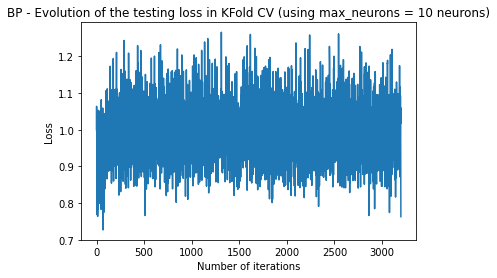

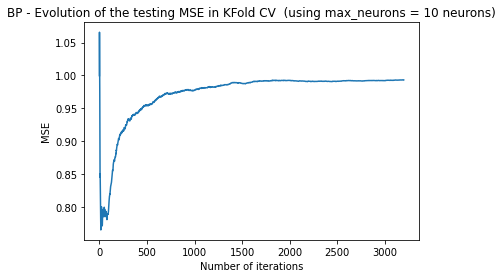

In [2326]:
plotEvolutionInCV(lossCV_BP, mseCV_BP, method, max_neurons)

### Training Neural Network

In [2327]:
l1_, l2_, alpha, n_neuron = getBestParams(lossCV_BP, best_valCV_BP)

len(lossTestingKFold) =  3200
len(best_val) =  3200
Best lambda1 :  0.01
Best lambda2 :  0.08
Best alpha :  2e-07
Best n_neuron :  3
The loss we had with those three params :  0.7266446043820561


In [2328]:
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

In [2329]:
W1, W2, lossTRAIN_BP, lossTEST_BP, MSE_train_BP, MSE_test_BP = backPropagation(X_train.T, X_test.T, y_train, y_test, W1, W2, l1_, l2_, alpha, N, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:01<00:00, 4322.01it/s]

W2.shape :  (1, 3)
W1.shape :  (3, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


In [2793]:
lossTRAIN_BP[-1], lossTEST_BP[-1]

(10.432977539872974, 3.491449281023188)

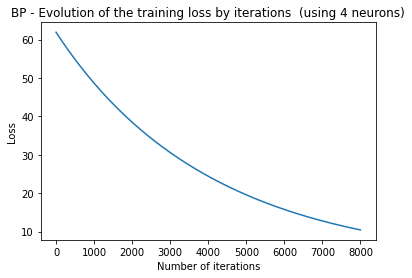

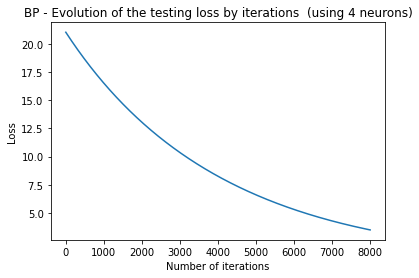

The training MSE is : 998.8342958326778
The testing MSE is : 114.6703543837977


In [2338]:
method = 'BP'
plotEvolution(lossTRAIN_BP, lossTEST_BP, MSE_train_BP, MSE_test_BP, method, n_neuron)

In [2374]:
printNorms(W1, W2)

2.22177344087361
0.35961334016686874


In [2341]:
W1[0]

array([0.87817779, 0.69897488, 0.38325431, 0.82930796, 0.24993874,
       0.15099981, 0.58164842, 0.38153417, 0.74406764, 0.83265975,
       0.83614865, 0.29816856, 0.48756227, 0.00104773])

In [2342]:
W2

array([[-0.1047813 ,  0.34256299,  0.03151554]])

## b- mini-bath SGD 

In [1606]:
def create_mini_batches(X, y, batch_size):
    
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
    return mini_batches 

In [2351]:
def miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, batch_size, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # just to avoid prints when we do cross validation
    if(with_print) :
        
        for i in tqdm(range(N)) :
                  
            mini_batches_train = create_mini_batches(X_train, y_train, batch_size)

            for mini_batch in mini_batches_train:

                X_train, y_train = mini_batch 
                
                lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
                lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

                lossTrain[i] = lossTrain_
                lossTest[i] = lossTest_
                
                grad_1, grad_2 = computePartialDerivative(X_train.T, y_train, W1, W2, lambda1, lambda2)

                W1 = W1 - alpha*grad_1
                W2 = W2 - alpha*grad_2
                
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)

        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
        print("Last loss value : ", lossArray[-1])
        
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test
    
    else :
        
        for i in range(N) :
                  
            mini_batches_train = create_mini_batches(X_train, y_train, batch_size)

            for mini_batch in mini_batches_train:

                X_train, y_train = mini_batch 
                
                lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
                lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

                lossTrain[i] = lossTrain_
                lossTest[i] = lossTest_

                grad_1, grad_2 = computePartialDerivative(X_train.T, y_train, W1, W2, lambda1, lambda2)

                W1 = W1 - alpha*grad_1
                W2 = W2 - alpha*grad_2
        
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test

In [2345]:
def KFoldCrossValidation_SGD(k, X, Y, lambda1, lambda2, N, min_neurons, max_neurons,alphas, batch_size, with_print=0):
    
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    neurons = range(min_neurons,max_neurons+1)
    
    df = getData()
    
    
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix learning rate
            for alpha in alphas :
                # fix lambda 1
                for l1 in lambda1 :
                    # fix lambda 2
                    for l2 in lambda2 :
                        
                        # shuffle the dataset
                        df = shuffle(df)
                        
                        # to avoid having same random_state in each iteration
                        randomValue = np.random.randint(50,size=1)[0]
                        
                        # The test sample resprensents the N/k size of the dataset with KFold
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                        W1 = np.random.rand(n_neuron,d)
                        W2 = np.random.rand(1,n_neuron)
                        
                        # Training and testing
                        W1, W2, lossTrain, lossTest, MSE_train, MSE_test = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1, l2, alpha, N, batch_size, with_print)

                        # cost
                        real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                        loss.append(real_loss)
                        
                        loss_arr = np.array(loss)
                        real_mse = MSE(loss_arr)
                        mse.append(real_mse)

                        # hyper params
                        best_val.append((l1,l2,alpha, n_neuron))
                

    # return the best two params l1, l2
    l1_, l2_, alpha_, n_neuron_ = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, alpha_, n_neuron_


### KFold Cross-Validation to find best hyper-parameters

In [2348]:
method = 'Mini-Batch SGD'

In [2349]:
k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
alphas = [ 2*10**(-i) for i in range(3,nbr_hyp_param_alpha+1)]

min_neurons = 3
max_neurons = 10

batch_size = 32

In [2352]:
lossCV_SGD_1, mseCV_SGD_1, best_valCV_SGD_1, l1_CV_SGD_1, l2_CV_SGD_1, alpha_CV_SGD_1, n_neuron_CV_SGD_1 = KFoldCrossValidation_SGD(k, X, Y, lambda1, lambda2, N, min_neurons, max_neurons, alphas, batch_size)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [09:57<00:00, 119.59s/it]


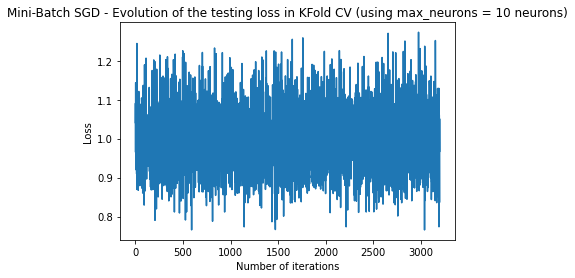

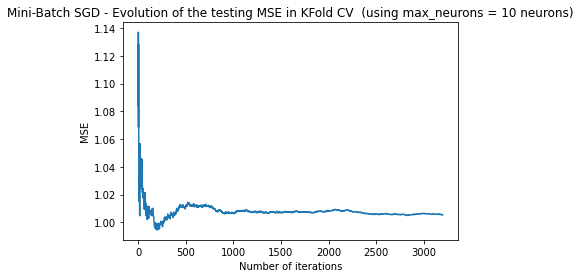

In [2666]:
method = 'Mini-Batch SGD'
plotEvolutionInCV(lossCV_SGD_1, mseCV_SGD_1, method, max_neurons)

### Training Neural Network

In [2379]:
l1_SGD, l2_SGD, alpha_SGD, n_neuron_ = getBestParams(lossCV_SGD_1, best_valCV_SGD_1)

len(lossTestingKFold) =  3200
len(best_val) =  3200
Best lambda1 :  0.002
Best lambda2 :  0.004
Best alpha :  2e-07
Best n_neuron :  8
The loss we had with those three params :  0.7656184014726228


In [2380]:
batch_size = 32
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron_,d)
W2 = np.random.rand(1,n_neuron_)

In [2381]:
X_train, X_test, y_train, y_test = getPreprocessedData()

In [2382]:
W1, W2, lossTRAIN_SGD, lossTEST_SGD, MSE_train_SGD, MSE_test_SGD = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD, l2_SGD, alpha_SGD, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:02<00:00, 3524.19it/s]

W2.shape :  (1, 8)
W1.shape :  (8, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


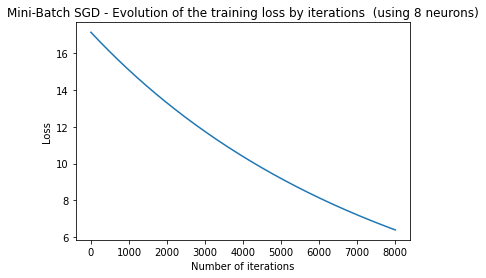

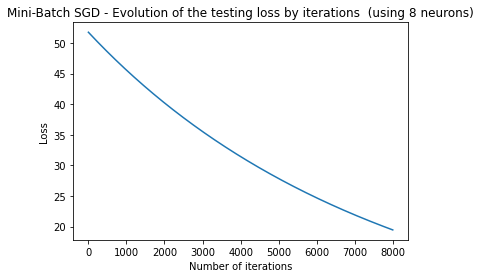

The training MSE is : 126.69706554374011
The testing MSE is : 1161.4729028266183


In [2383]:
method = 'Mini-Batch SGD'
plotEvolution(lossTRAIN_SGD, lossTEST_SGD, MSE_train_SGD, MSE_test_SGD, method, n_neuron_)

### Mini Batch SGD with batch size equal to 32

In [2396]:
batch_size = 32
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron_,d)
W2 = np.random.rand(1,n_neuron_)

X_train, X_test, y_train, y_test = getPreprocessedData()

In [2397]:
W1, W2, lossTRAIN_SGD, lossTEST_SGD, MSE_train_SGD, MSE_test_SGD = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD, l2_SGD, alpha_SGD, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:02<00:00, 3450.61it/s]

W2.shape :  (1, 8)
W1.shape :  (8, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


In [2792]:
lossTRAIN_SGD[-1]

0.40471951878080975

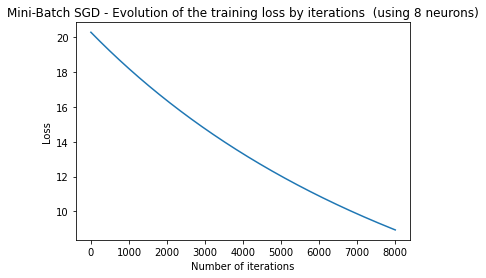

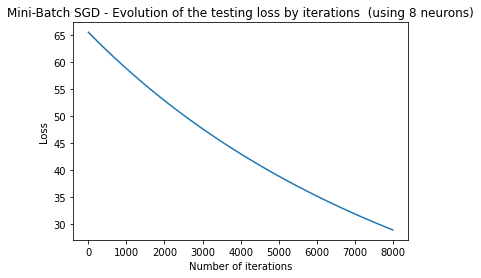

The training MSE is : 199.3264496138547
The testing MSE is : 2078.164398521288


In [2398]:
plotEvolution(lossTRAIN_SGD, lossTEST_SGD, MSE_train_SGD, MSE_test_SGD, method, n_neuron_)

### Simulating BP by using batch size equal to length of the dataset

In [2399]:
batch_size = len(Y)
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron_,d)
W2 = np.random.rand(1,n_neuron_)

X_train, X_test, y_train, y_test = getPreprocessedData()

In [2400]:
W1, W2, lossTRAIN_SGD_BP, lossTEST_SGD_BP, MSE_train_SGD_BP, MSE_test_SGD_BP = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD, l2_SGD, alpha_SGD, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1015.39it/s]

W2.shape :  (1, 8)
W1.shape :  (8, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


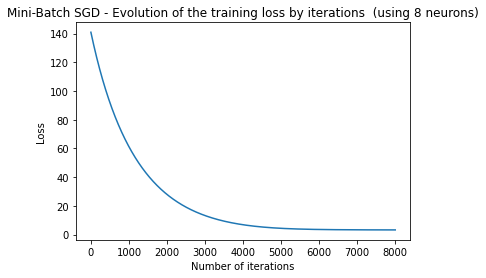

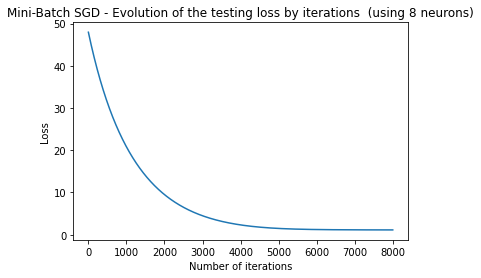

The training MSE is : 1496.8803827572622
The testing MSE is : 173.15399152457567


In [2401]:
plotEvolution(lossTRAIN_SGD_BP, lossTEST_SGD_BP, MSE_train_SGD_BP, MSE_test_SGD_BP, method, n_neuron_)

### Comments :

We can remark that with a full batch SGD, we achieve the same performance as a Back-Propagation. 
We also get a better testing MSE.

# c- ADAM

In [2415]:
def ADAM(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, beta1, beta2, n_neuron, N, d, use_one_rs, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # For W1
    U1 = np.zeros((n_neuron,d))
    V1 = np.zeros((n_neuron,d))
    
    # For W2
    U2 = np.zeros((1,n_neuron))
    V2 = np.zeros((1,n_neuron))
    
    # delta to prevent any division by zero
    delta = 1e-5
       
        
    if (with_print):
        
        for i in tqdm(range(N)) :
         
            # Compute Loss on prediction            
            lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_

            if (use_one_rs):

                # compute gradient for one random sample i
                random_sample_indice = np.random.randint(X_train.shape[0])        
                random_X = X_train[random_sample_indice].reshape(-1,1)
                random_y = y_train[random_sample_indice].reshape(-1,1)       

                grad_1, grad_2 = computePartialDerivative(random_X, random_y, W1, W2, lambda1, lambda2)

            else :
                # compute gradient on full X_train
                grad_1, grad_2 = computePartialDerivative(X_train.T, y_train, W1, W2, lambda1, lambda2)

            # approximate bias for FoM
            U1 = beta1*U1 + (1-beta1)*grad_1
            U2 = beta1*U2 + (1-beta1)*grad_2

            # approximate bias for SoM
            V1 = beta2*V1 + (1-beta2)*grad_1*grad_1
            V2 = beta2*V2 + (1-beta2)*grad_2*grad_2


            # compute bias term of FoM
            x1 = 1- (beta1**i) + delta
            bias_U1 = U1/x1
            bias_U2 = U2/x1

            #compute bias term of SoM
            x2 = 1- (beta2**i) + delta
            bias_V1 = V1/x2
            bias_V2 = V2/x2

            # update weights
            inverse_1 = np.linalg.pinv((np.sqrt(bias_V1) + delta))
            inverse_2 = np.linalg.pinv((np.sqrt(bias_V2) + delta))

            W1 = W1 - inverse_1.T*bias_U1
            W2 = W2 - (inverse_2*bias_U2.T).T

            # to avoid the blowing weight effect
            minmax = MinMaxScaler()
            W1 = minmax.fit_transform(W1)
            minmax = MinMaxScaler()
            W2 = minmax.fit_transform(W2)
            
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
        
        return  W1, W2, lossTrain, lossTest, MSE_train, MSE_test
        
    else :
        for i in range(N) :
         
            # Compute Loss on prediction
            lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_  

            if (use_one_rs):

                # compute gradient for one random sample i
                random_sample_indice = np.random.randint(X_train.shape[0])        
                random_X = X_train[random_sample_indice].reshape(-1,1)
                random_y = y_train[random_sample_indice].reshape(-1,1)       

                grad_1, grad_2 = computePartialDerivative(random_X, random_y, W1, W2, lambda1, lambda2)

            else :
                # compute gradient for X_train
                grad_1, grad_2 = computePartialDerivative(X_train.T, y_train, W1, W2, lambda1, lambda2)

            # approximate bias for FoM
            U1 = beta1*U1 + (1-beta1)*grad_1
            U2 = beta1*U2 + (1-beta1)*grad_2

            # approximate bias for SoM
            V1 = beta2*V1 + (1-beta2)*grad_1*grad_1
            V2 = beta2*V2 + (1-beta2)*grad_2*grad_2


            # compute bias term of FoM
            x1 = 1- (beta1**i) + delta
            bias_U1 = U1/x1
            bias_U2 = U2/x1

            #compute bias term of SoM
            x2 = 1- (beta2**i) + delta
            bias_V1 = V1/x2
            bias_V2 = V2/x2

            # update weights
            inverse_1 = np.linalg.pinv((np.sqrt(bias_V1) + delta))
            inverse_2 = np.linalg.pinv((np.sqrt(bias_V2) + delta))

            W1 = W1 - inverse_1.T*bias_U1
            W2 = W2 - (inverse_2*bias_U2.T).T

            # to avoid the blowing weight effect
            minmax = MinMaxScaler()
            W1 = minmax.fit_transform(W1)
            minmax = MinMaxScaler()
            W2 = minmax.fit_transform(W2)
            
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        return  W1, W2, lossTrain, lossTest, MSE_train, MSE_test

In [2416]:
def KFoldCrossValidation_ADAM(k, X, Y, lambda1, lambda2, beta1, beta2, min_neurons, max_neurons, N, d, use_one_rs, with_print):
    
    d = X.shape[1]
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    with_print = 0
    neurons = range(min_neurons,max_neurons+1)
    
    df = getPreprocessedData()
    
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix beta 1
            for b1 in beta1 :
                # fix beta 2
                for b2 in beta2 :
                    # fix lambda 1
                    for l1 in lambda1 :
                        # fix lambda 2
                        for l2 in lambda2 :
                            # shuffle the dataset
                            df = shuffle(df)
                            # to avoid having same random_state in each iteration
                            randomValue = np.random.randint(50,size=1)[0]
                            # The test sample resprensents the N/k size of the dataset with KFold
                            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                            W1 = np.random.rand(n_neuron,d)
                            W2 = np.random.rand(1,n_neuron)

                            # Training and testing
                            W1, W2, lossTrain, lossTest, MSE_train, MSE_test = ADAM(X_train, X_test, y_train, y_test, W1, W2, l1, l2, b1, b2, n_neuron, N, d, use_one_rs, with_print)
                            
                            # cost
                            real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                            loss.append(real_loss)

                            loss_arr = np.array(loss)
                            real_mse = MSE(loss_arr)
                            mse.append(real_mse)
                        
                            # hyper params
                            best_val.append((l1,l2,b1,b2,n_neuron))
                
    # return the best two params l1, l2
    
    plt.plot(loss)
    plt.title('Evolution of the loss by adding more neurons')
    plt.show()
    
    l1_, l2_, b1_, b2_ , n_neuron = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, b1_, b2_ , n_neuron

In [2422]:
def getBestParams(lossTestingKFold, best_val):
   
    print ("len(lossTestingKFold) = ", len(lossTestingKFold))
    print ("len(best_val) = ", len(best_val))
    
    l1_, l2_, b1_, b2_ , n_neuron = best_val[lossTestingKFold.index(min(lossTestingKFold))]
    print("Best lambda1 : ", l1_)
    print("Best lambda2 : ", l2_)
    print("Best beta 1 : ", b1_)
    print("Best beta 2 : ", b2_)
    print("Best n_neuron : ", n_neuron)
    
    print("The loss we had with those three params : ", lossTestingKFold[lossTestingKFold.index(min(lossTestingKFold))])
    
    return l1_, l2_, b1_, b2_, n_neuron

### KFold Cross-Validation to find best hyper-parameters

In [2410]:
k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
beta1 = [0.1, 0.8, 0.05]
beta2 = [0.1, 0.75, 0.05]

min_neurons = 3
max_neurons = 10

use_one_rs = True
with_print = False

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [19:12<00:00, 230.47s/it]


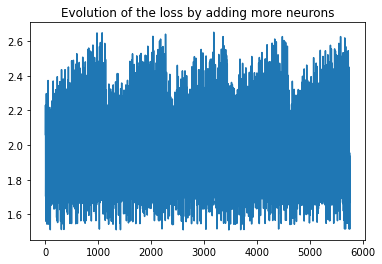

In [2411]:
lossCV_ADAM_1, mseCV_ADAM_1, best_valCV_ADAM_1, l1_CV_ADAM_1, l2_CV_SADAM_1, beta1_CV_ADAM_1, beta2_CV_ADAM_1, n_neuron_CV_ADAM_1 = KFoldCrossValidation_ADAM(k, X, Y, lambda1, lambda2, beta1, beta2, min_neurons, max_neurons, N, d, use_one_rs, with_print)

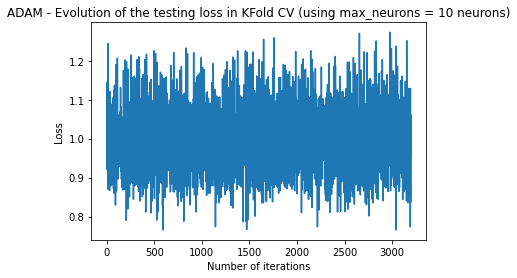

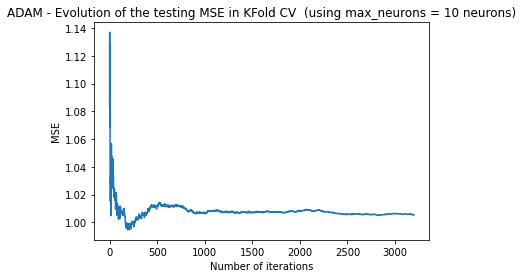

In [2412]:
method = 'ADAM'
plotEvolutionInCV(lossCV_SGD_1, mseCV_SGD_1, method, max_neurons)

### Training Neural Network

In [2423]:
l1_ADAM_1, l2_ADAM_1, beta1_ADAM_1, beta2_ADAM_1, n_neuron_ = getBestParams(lossCV_ADAM_1, best_valCV_ADAM_1)

len(lossTestingKFold) =  5760
len(best_val) =  5760
Best lambda1 :  0.002
Best lambda2 :  0.004
Best beta 1 :  0.1
Best beta 2 :  0.1
Best n_neuron :  3
The loss we had with those three params :  1.5110344509418767


In [2426]:
N= 8000
d = X.shape[1]
with_print = 1

W1 = np.random.rand(n_neuron_,d)
W2 = np.random.rand(1,n_neuron_)

use_one_rs = True
with_print = True

X_train, X_test, y_train, y_test = getPreprocessedData()

In [2427]:
W1, W2, lossTRAIN_ADAM_1, lossTEST_ADAM_1, MSE_train_ADAM_1, MSE_test_ADAM_1 = ADAM(X_train, X_test, y_train, y_test, W1, W2, l1_ADAM_1, l2_ADAM_1, beta1_ADAM_1, beta2_ADAM_1, n_neuron, N, d, use_one_rs, with_print)

100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:08<00:00, 918.13it/s]

W2.shape :  (1, 3)
W1.shape :  (3, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


In [2795]:
lossTEST_ADAM_1[-1]

2.288980989326432

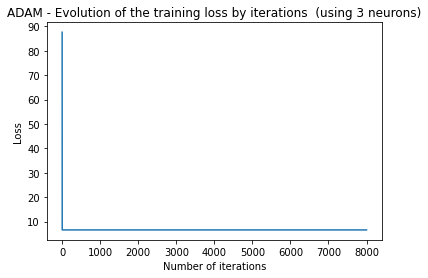

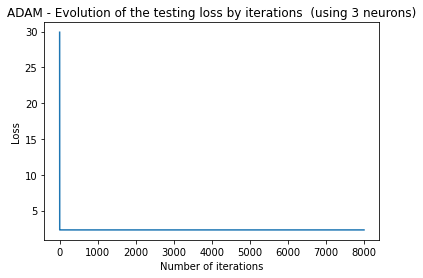

The training MSE is : 43.82568709721892
The testing MSE is : 5.350807674177033


In [2428]:
method = 'ADAM'
plotEvolution(lossTRAIN_ADAM_1, lossTEST_ADAM_1, MSE_train_ADAM_1, MSE_test_ADAM_1, method, n_neuron_)

# d- BCD

In [2519]:
def BCD_First_Component(X, Y, alpha, W1, W2):
    

    X_W1T = np.dot(X,np.transpose(W1))
    X_W1T_W2T = np.dot(X_W1T,np.transpose(W2))                          

    grad_1 = np.multiply(2,np.dot(np.dot(X.T,(X_W1T_W2T - Y)),W2) + np.transpose(W1))
    
    W1 = W1 - np.multiply(alpha,grad_1).T
    loss = np.multiply(sum(X_W1T_W2T - Y), sum(X_W1T_W2T - Y))
        
    return W1, loss

In [2520]:
def BCD_SECOND_Component(X, Y, alpha, W1, W2):
    
    X_W1T = np.dot(X,np.transpose(W1))
    X_W1T_W2T = np.dot(X_W1T,np.transpose(W2))                          

    grad_2 = np.dot(W1,np.dot(X.T,(X_W1T_W2T - Y))) 
    
    W2 = W2 - np.multiply(alpha,grad_2).T
    
    loss = np.multiply(sum(X_W1T_W2T - Y), sum(X_W1T_W2T - Y))
    
    return W2, loss

In [2600]:
def BCD(X, Y, W1, W2, N, alpha, start_W1, in_test) :
    
    lossTest = []
    lossTrain = []
    iterations = [i for i in range(2*N)]
    
    ts = 0.25
    
    X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size=ts, random_state=42)
    
    if(start_W1):
    
        # Optimize W1 then W2
        for i in range(N):
            W1 ,loss_ = BCD_First_Component(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_First_Component(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
        for i in range(N):
            W2 ,loss_ = BCD_SECOND_Component(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_SECOND_Component(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
    else :
        
        # Optimize W2 then W1
        for i in range(N):
            W2 ,loss_ = BCD_SECOND_Component(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_SECOND_Component(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
        for i in range(N):
            W1 ,loss_ = BCD_First_Component(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_First_Component(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
    lossTrain = np.array(lossTrain)
    lossTest = np.array(lossTest)
            
    
    MSE_TRAIN = MSE(lossTrain)
    MSE_TEST = MSE(lossTest)
        
    if in_test == False :
        
        plt.plot(iterations,lossTest)
        plt.ylabel('Loss')
        plt.xlabel('Number of iterations')
        plt.show()
        
        print("MSE in TRAIN : ", MSE_TRAIN)
        print("MSE in TEST : ", MSE_TEST)
    
        return W1, W2, lossTest, lossTrain, MSE_TRAIN, MSE_TEST
    
    else :
        print("MSE in TEST : ", MSE_TEST)

### Training the BCD

In [2613]:
alpha = 0.0001
N = 1500
n_neuron = 10
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

start_W1 = False
in_test = False

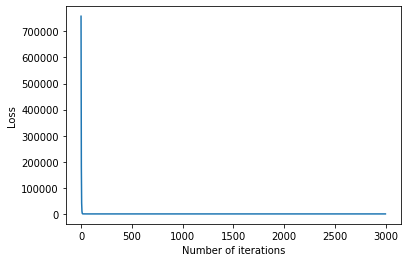

MSE in TRAIN :  59698836269.64167
MSE in TEST :  310534013.27111584


In [2614]:
W1, W2, lossTest, lossTrain, MSE_TRAIN, MSE_TEST = BCD(X.T, Y, W1, W2, N, alpha,start_W1, in_test)

In [2615]:
lossTest_BCD[-1]

array([0.346095])

In [2616]:
print(W1[0])

[0.33142015 0.72655253 0.13968039 0.58735792 0.54376678 0.18804652
 0.74070296 0.28101397 0.23459521 0.02714872 0.37873349 0.36871046
 0.39841566 0.49272203]


In [2617]:
print(W2)

[[ 0.17736307 -0.0170696   0.52084096 -0.36843432 -0.21034578  0.07251419
  -0.08194937  0.30979761  0.16357709 -0.37387451]]


### Testing the BCD

In [2621]:
N = 1
in_test = True
BCD(X.T, Y, W1, W2, N, alpha,start_W1, in_test)

MSE in TEST :  0.4051590314955691


## Comments :

The BCD converges and the MSE in test is really low in testing with one sample despite being so high in training!

# Part II: Deep Neural Network

Let us now add the following logistic activation, where σ(x) = 1/(1+exp(−x)) at each layer.
In this part, we will implement the same methods as in part I but this time using a logistic activation. Taking into account the fact that the logistic activation **compresses** its output between [0, 1], the optimization problem considered is the following:

$$ min_{W_{2},W_{1}}  \frac{1}{N} \sum_{i=1}^{N} \left \| \sigma(W_{2}\sigma(W_{1}x_{i})) - y_{i}\right \|_{2}^{2} + \lambda_{1}\left \| W_{1} \right \|_{F}^{2} + \lambda_{2}\left \| W_{2} \right \|_{F}^{2} $$

The logistic activation is defined as :
$$ \sigma(z) = \frac{1}{1+exp(-z)}$$

Therefore it's derivative is :

$$ \sigma'(z) = \frac{z*exp(-z)}{(1+exp(-z))^{2}}$$

In [2622]:
def getData():
    data = pd.read_csv("data/Bodyfat.csv", sep=',')
    data = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'bodyfat']]
    data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)] # remove outliers
    
    # transforming to class data
    #treshold = data["bodyfat"].median()
    #data['bodyfat'] = np.where(data.bodyfat < treshold ,0,1)
        
    return data

In [2623]:
def getPreprocessedData():
    data = pd.read_csv("data/Bodyfat.csv", sep=',')
    data = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'bodyfat']]
    data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)] # remove outliers
    
    # transforming to class data
    
    #treshold = data["bodyfat"].median()
    #data['bodyfat'] = np.where(data.bodyfat < treshold ,0,1)
    
    data = shuffle(data)
    
    minmax = MinMaxScaler()
    data = minmax.fit_transform(data)
    X = data[: , :-1]
    Y = data[: , data.shape[1]-1:data.shape[1]]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [2769]:
def activation(z) :
    return 1/(1+np.exp(-z))

def derivateActivation(z) :
    a = np.exp(-z)
    b = (1+np.exp(-z))**2
    return a/b

In [2625]:
def computePartialDerivativeCLF(X, Y, W1, W2, lambda1, lambda2) :
    
    W1_XT = np.dot(W1, X.T)
    sig_W1_XT = activation(W1_XT)
    
    W2_sig_W1_XT = np.dot(W2, sig_W1_XT)
    sig_W2_sig_W1_XT = activation(W2_sig_W1_XT)
    
    ffwd = (sig_W2_sig_W1_XT - Y.T)        
    
    # for grad_1
    tmp_1 = np.dot(sig_W1_XT, X)    
    W2T_ffwd = np.dot(W2.T, ffwd)
    
    derv_1 = derivateActivation(sig_W2_sig_W1_XT)
    derv_2 = derivateActivation(sig_W1_XT)
        
    mult_1 = np.multiply(W2T_ffwd,derv_1)
    mult_2 = np.multiply(mult_1,derv_2)
    
    all_int_mul_1 = np.dot(mult_2, X)
    
    # for grad 2    
    mult_3 = np.multiply(ffwd,derv_1)    
    all_int_mul_2 = np.dot(mult_3, sig_W1_XT.T)
    
    
    # compute the final result
    
    grad_1 = (2/X.shape[0])*all_int_mul_1 + 2*lambda1*W1    
    grad_2 = (2/X.shape[0])*all_int_mul_2 + 2*lambda2*W2
    
    return grad_1, grad_2


def computeLoss(X, Y, W1, W2, lambda1, lambda2) :
    
    W1_W2 = np.dot(W2, W1)
    ffwd = np.dot(W1_W2, X) - Y
    
    norm_1 =  (1/X.shape[0])*np.linalg.norm(ffwd) 
    norm_2 = lambda1*np.linalg.norm(W1) 
    norm_3 = lambda2*np.linalg.norm(W2)
    
    return norm_1 + norm_2 + norm_3

## Back Propagation

In [2633]:
def backPropagationCLF(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # just to avoid prints when we do cross validation
    if (with_print):
        for i in tqdm(range(N)) :

            lossTrain_ = computeLoss(X_train, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_


            grad_1, grad_2 = computePartialDerivativeCLF(X_train.T, y_train, W1, W2, lambda1, lambda2)

            W1 = W1 - alpha*grad_1
            W2 = W2 - alpha*grad_2
            
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)

        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
    
    
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test

    else :
        
        for i in range(N) :

            lossTrain_ = computeLoss(X_train, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_

            grad_1, grad_2 = computePartialDerivativeCLF(X_train.T, y_train, W1, W2, lambda1, lambda2)

            W1 = W1 - alpha*grad_1
            W2 = W2 - alpha*grad_2
            
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)

        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test

In [2639]:
def KFoldCrossValidation_BP_CLF(k, X, Y, lambda1, lambda2, N, alphas, min_neurons, max_neurons, with_print):
    
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    df = getData()
    
    neurons = range(min_neurons,max_neurons+1)
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix learning rate
            for alpha in alphas :
                # fix lambda 1
                for l1 in lambda1 :
                    # fix lambda 2
                    for l2 in lambda2 :
                        # shuffle the dataset
                        df = shuffle(df)
                        # to avoid having same random_state in each iteration
                        randomValue = np.random.randint(50,size=1)[0]
                        # The test sample resprensents the N/k size of the dataset with KFold
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                        W1 = np.random.rand(n_neuron,d)
                        W2 = np.random.rand(1,n_neuron)
                        
                        # Training and testing
                        W1, W2, lossTrain, lossTest, MSE_train, MSE_test = backPropagationCLF(X_train.T, X_test.T, y_train, y_test, W1, W2, l1, l2, alpha, N, with_print)
                        
                        # cost
                        real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                        loss.append(real_loss)
                        
                        loss_arr = np.array(loss)
                        real_mse = MSE(loss_arr)
                        mse.append(real_mse)
                        
                        # hyper params
                        best_val.append((l1,l2,alpha, n_neuron))
                
    # return the best two params l1, l2
    l1_, l2_, alpha_, n_neuron_ = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, alpha_, n_neuron_

In [2682]:
def getBestParams(lossTestingKFold, best_val):
   
    print ("len(lossTestingKFold) = ", len(lossTestingKFold))
    print ("len(best_val) = ", len(best_val))
    
    l1_, l2_, alpha, n_neuron = best_val[lossTestingKFold.index(min(lossTestingKFold))]
    print("Best lambda1 : ", l1_)
    print("Best lambda2 : ", l2_)
    print("Best alpha : ", alpha)
    print("Best n_neuron : ", n_neuron)
    
    print("The loss we had with those three params : ", lossTestingKFold[lossTestingKFold.index(min(lossTestingKFold))])
    
    return l1_, l2_, alpha, n_neuron

### KFold Cross-Validation to find best hyper-parameters

In [2641]:
method = 'BP'

k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
alphas = [ 2*10**(-i) for i in range(3,nbr_hyp_param_alpha+1)]

min_neurons = 3
max_neurons = 10

with_print = 0

In [2642]:
lossCV_BP_2, mseCV_BP_2, best_valCV_BP_2, l1_CV_BP_2, l2_CV_BP_2, alpha_BP_2,n_neuron_CV_BP_2 = KFoldCrossValidation_BP_CLF(k, X, Y, lambda1, lambda2, N, alphas, min_neurons, max_neurons, with_print)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:31<00:00, 42.21s/it]


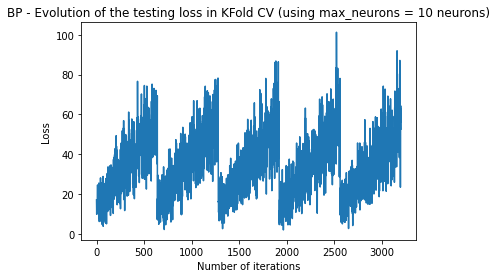

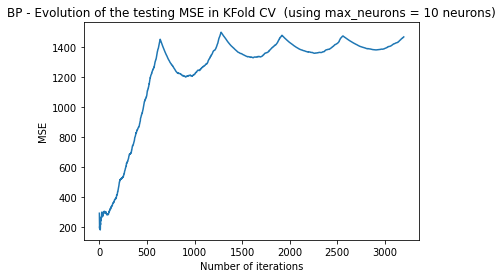

In [2643]:
plotEvolutionInCV(lossCV_BP_2, mseCV_BP_2, method, max_neurons)

### Training Neural Network

In [2644]:
l1_BP_2, l2_BP_2, alpha_BP_2, n_neuron_BP_2 = getBestParams(lossCV_BP_2, best_valCV_BP_2)

len(lossTestingKFold) =  3200
len(best_val) =  3200
Best lambda1 :  0.002
Best lambda2 :  0.1
Best alpha :  2e-05
Best n_neuron :  3
The loss we had with those three params :  2.0826321800525642


In [2927]:
l1_BP_2, l2_BP_2, alpha_BP_2, n_neuron_BP_2

(0.002, 0.1, 2e-05, 3)

In [2928]:
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron_BP_2,d)
W2 = np.random.rand(1,n_neuron_BP_2)

In [2929]:
W1, W2, lossTRAIN_BP_2, lossTEST_BP_2, MSE_train_BP_2, MSE_test_BP_2 = backPropagationCLF(X_train.T, X_test.T, y_train, y_test, W1, W2, l1_BP_2, l2_BP_2, alpha_BP_2, N, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:03<00:00, 2565.60it/s]

W2.shape :  (1, 3)
W1.shape :  (3, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


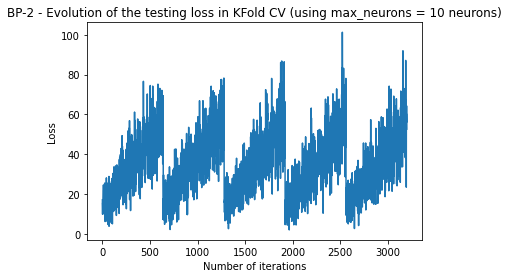

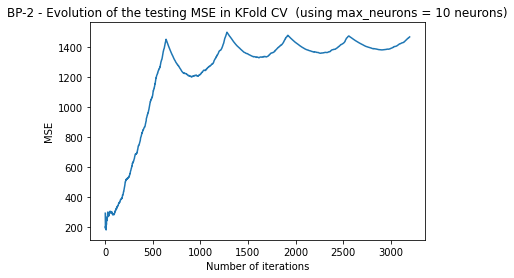

In [2797]:
method = 'BP-2'
plotEvolutionInCV(lossCV_BP_2, mseCV_BP_2, method, max_neurons)

In [2933]:
lossTRAIN_BP_2[-1]

32.79834327943359

In [2932]:
lossTEST_BP_2[-1]

10.870792713163434

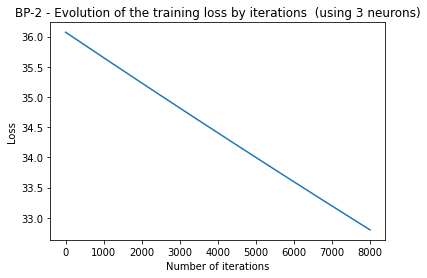

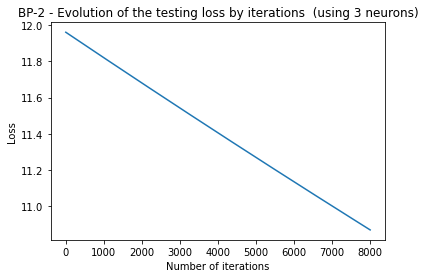

The training MSE is : 1185.2806817216215
The testing MSE is : 130.26158558817983


In [2931]:
method = 'BP-2'
plotEvolution(lossTRAIN_BP_2, lossTEST_BP_2, MSE_train_BP_2, MSE_test_BP_2, method, n_neuron_BP_2)

# b- Mini-batch SGD

In [2683]:
def miniBatchSGD_CLF(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, batch_size, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # just to avoid prints when we do cross validation
    if(with_print) :
        
        for i in tqdm(range(N)) :
                  
            mini_batches_train = create_mini_batches(X_train, y_train, batch_size)

            for mini_batch in mini_batches_train:

                X_train, y_train = mini_batch 
                
                lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
                lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

                lossTrain[i] = lossTrain_
                lossTest[i] = lossTest_
                grad_1, grad_2 = computePartialDerivativeCLF(X_train, y_train, W1, W2, lambda1, lambda2)

                W1 = W1 - alpha*grad_1
                W2 = W2 - alpha*grad_2
        
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)

        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
        print("Last loss value : ", lossArray[-1])
        
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test
    
    else :
        
        for i in range(N) :
                  
            mini_batches_train = create_mini_batches(X_train, y_train, batch_size)

            for mini_batch in mini_batches_train:

                X_train, y_train = mini_batch 
                
                lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
                lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

                lossTrain[i] = lossTrain_
                lossTest[i] = lossTest_

                grad_1, grad_2 = computePartialDerivativeCLF(X_train, y_train, W1, W2, lambda1, lambda2)

                W1 = W1 - alpha*grad_1
                W2 = W2 - alpha*grad_2
                
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        return W1, W2, lossTrain, lossTest, MSE_train, MSE_test

def create_mini_batches(X, y, batch_size=64):
    
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
    return mini_batches 

In [2710]:
def KFoldCrossValidation_SGD_CLF(k,  X, Y, d, lambda1, lambda2, min_neurons, max_neurons, N, alphas, batch_size, with_print):
    
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    with_print = 0
    neurons = range(min_neurons,max_neurons+1)
    
    df = getData()
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix learning rate
            for alpha in alphas :
                # fix lambda 1
                for l1 in lambda1 :
                    # fix lambda 2
                    for l2 in lambda2 :
                        # shuffle the dataset
                        df = shuffle(df)
                        # to avoid having same random_state in each iteration
                        randomValue = np.random.randint(50,size=1)[0]
                        # The test sample resprensents the N/k size of the dataset with KFold
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                        W1 = np.random.rand(n_neuron,d)
                        W2 = np.random.rand(1,n_neuron)

                        # Training and testing
                        W1, W2, lossTrain, lossTest, MSE_train, MSE_test = miniBatchSGD_CLF(X_train, X_test, y_train, y_test, W1, W2, l1, l2, alpha, N, batch_size, with_print)
                        
                        # cost
                        real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                        loss.append(real_loss)
                        
                        loss_arr = np.array(loss)
                        real_mse = MSE(loss_arr)
                        mse.append(real_mse)

                        # hyper params
                        best_val.append((l1,l2,alpha,n_neuron))
                
    # return the best two params l1, l2
    
    plt.plot(loss)
    plt.title('Evolution of the loss by adding more neurons')
    plt.show()
    
    l1_, l2_, alpha_, n_neuron = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, alpha_, n_neuron

### KFold Cross-Validation to find best hyper-parameters

In [2711]:
method = 'Mini-Batch SGD - 2 '

In [2712]:
k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
alphas = [ 2*10**(-i) for i in range(3,nbr_hyp_param_alpha+1)]

min_neurons = 3
max_neurons = 10

batch_size = 32
with_print = 0

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:35<00:00, 31.13s/it]


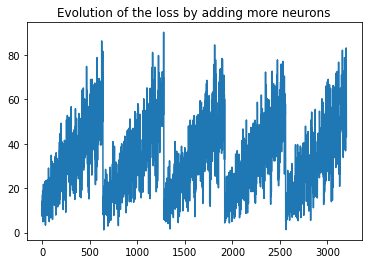

In [2713]:
lossCV_SGD_2, mseCV_SGD_2, best_valCV_SGD_2, l1_CV_SGD_2, l2_CV_SGD_2, alpha_CV_SGD_2, n_neuron_CV_SGD_2 = KFoldCrossValidation_SGD_CLF(k, X, Y, d, lambda1, lambda2, min_neurons, max_neurons, N, alphas, batch_size, with_print)

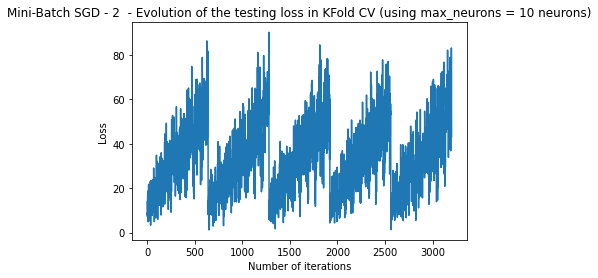

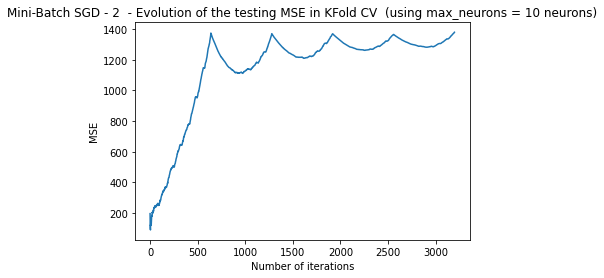

In [2720]:
method = 'Mini-Batch SGD - 2 '
plotEvolutionInCV(lossCV_SGD_2, mseCV_SGD_2, method, max_neurons)

### Training Neural Network

In [2721]:
l1_SGD_2, l2_SGD_2, alpha_SGD_2, n_neuron_SGD_2 = getBestParams(lossCV_SGD_2, best_valCV_SGD_2)

len(lossTestingKFold) =  3200
len(best_val) =  3200
Best lambda1 :  0.02
Best lambda2 :  0.08
Best alpha :  0.002
Best n_neuron :  3
The loss we had with those three params :  1.2144951734330922


In [2802]:
batch_size = 32
N= 8000
d = X.shape[1]
with_print = 1
W1 = np.random.rand(n_neuron_SGD_2,d)
W2 = np.random.rand(1,n_neuron_SGD_2)

In [2803]:
X_train, X_test, y_train, y_test = getPreprocessedData()

In [2804]:
W1, W2, lossTRAIN_SGD_2, lossTEST_SGD_2, MSE_train_SGD_2, MSE_test_SGD_2 = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD_2, l2_SGD_2, alpha_SGD_2, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:02<00:00, 3635.98it/s]

W2.shape :  (1, 3)
W1.shape :  (3, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


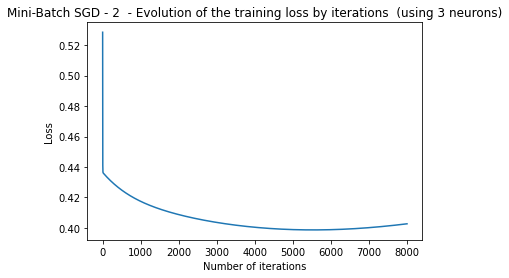

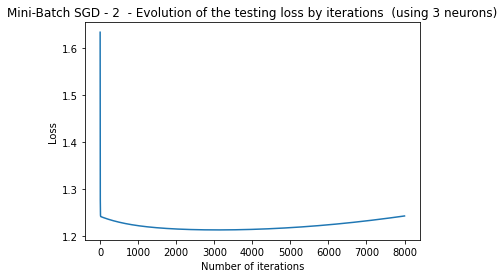

The training MSE is : 0.16464991980404015
The testing MSE is : 1.4923315749713433


In [2805]:
method = 'Mini-Batch SGD - 2 '
plotEvolution(lossTRAIN_SGD_2, lossTEST_SGD_2, MSE_train_SGD_2, MSE_test_SGD_2, method, n_neuron_)

# c- ADAM

In [2755]:
def ADAM_CLF(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, beta1, beta2, n_neuron, N, d, use_one_rs, with_print) :
    
    lossTrain = np.zeros(N)
    lossTest = np.zeros(N)
    
    # For W1
    U1 = np.zeros((n_neuron,d))
    V1 = np.zeros((n_neuron,d))
    
    # For W2
    U2 = np.zeros((1,n_neuron))
    V2 = np.zeros((1,n_neuron))
    
    # delta to prevent any division by zero
    delta = 1e-5
       
    # just to avoid prints when we do cross validation   
    if (with_print):
        
        for i in tqdm(range(N)) :
         
            # Compute Loss on prediction            
            lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_
            
            if (use_one_rs):

                # compute gradient for one random sample i
                random_sample_indice = np.random.randint(X_train.shape[0])        
                random_X = X_train[random_sample_indice].reshape(-1,1)
                random_y = y_train[random_sample_indice].reshape(-1,1)       

                grad_1, grad_2 = computePartialDerivativeCLF(random_X.T, random_y, W1, W2, lambda1, lambda2)

            else :
                # compute gradient for X_train
                grad_1, grad_2 = computePartialDerivativeCLF(X_train.T, y_train, W1, W2, lambda1, lambda2)

            # approximate bias for FoM
            U1 = beta1*U1 + (1-beta1)*grad_1
            U2 = beta1*U2 + (1-beta1)*grad_2

            # approximate bias for SoM
            V1 = beta2*V1 + (1-beta2)*grad_1*grad_1
            V2 = beta2*V2 + (1-beta2)*grad_2*grad_2


            # compute bias term of FoM
            x1 = 1- (beta1**i) + delta
            bias_U1 = U1/x1
            bias_U2 = U2/x1

            #compute bias term of SoM
            x2 = 1- (beta2**i) + delta
            bias_V1 = V1/x2
            bias_V2 = V2/x2

            # update weights
            inverse_1 = np.linalg.pinv((np.sqrt(bias_V1) + delta))
            inverse_2 = np.linalg.pinv((np.sqrt(bias_V2) + delta))

            W1 = W1 - inverse_1.T*bias_U1
            W2 = W2 - (inverse_2*bias_U2.T).T

            # to avoid the blowing weight effect
            minmax = MinMaxScaler()
            W1 = minmax.fit_transform(W1)
            minmax = MinMaxScaler()
            W2 = minmax.fit_transform(W2)
        
        print("W2.shape : ", W2.shape)
        print("W1.shape : ", W1.shape)
        print("X.shape : ", X.shape)
        print("Loss mean : ", lossArray.mean())
        
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        return  W1, W2, lossTrain, lossTest, MSE_train, MSE_test
    
    else :
        for i in range(N) :
         

            # Compute Loss on prediction            
            lossTrain_ = computeLoss(X_train.T, y_train, W1, W2, lambda1, lambda2)
            lossTest_ = computeLoss(X_test.T, y_test, W1, W2, lambda1, lambda2)

            lossTrain[i] = lossTrain_
            lossTest[i] = lossTest_

            if (use_one_rs):

                # compute gradient for one random sample i
                random_sample_indice = np.random.randint(X_train.shape[0])        
                random_X = X_train[random_sample_indice].reshape(-1,1)
                random_y = y_train[random_sample_indice].reshape(-1,1)       

                grad_1, grad_2 = computePartialDerivativeCLF(random_X.T, random_y, W1, W2, lambda1, lambda2)

            else :
                # compute gradient for X_train
                grad_1, grad_2 = computePartialDerivativeCLF(X_train.T, y_train, W1, W2, lambda1, lambda2)

            # approximate bias for FoM
            U1 = beta1*U1 + (1-beta1)*grad_1
            U2 = beta1*U2 + (1-beta1)*grad_2

            # approximate bias for SoM
            V1 = beta2*V1 + (1-beta2)*grad_1*grad_1
            V2 = beta2*V2 + (1-beta2)*grad_2*grad_2


            # compute bias term of FoM
            x1 = 1- (beta1**i) + delta
            bias_U1 = U1/x1
            bias_U2 = U2/x1

            #compute bias term of SoM
            x2 = 1- (beta2**i) + delta
            bias_V1 = V1/x2
            bias_V2 = V2/x2

            # update weights
            inverse_1 = np.linalg.pinv((np.sqrt(bias_V1) + delta))
            inverse_2 = np.linalg.pinv((np.sqrt(bias_V2) + delta))

            W1 = W1 - inverse_1.T*bias_U1
            W2 = W2 - (inverse_2*bias_U2.T).T

            # to avoid the blowing weight effect
            minmax = MinMaxScaler()
            W1 = minmax.fit_transform(W1)
            minmax = MinMaxScaler()
            W2 = minmax.fit_transform(W2)
            
        MSE_train = MSE(lossTrain)
        MSE_test = MSE(lossTest)
        
        return  W1, W2, lossTrain, lossTest, MSE_train, MSE_test

In [2756]:
def KFoldCrossValidation_ADAM_CLF(k, X, Y, lambda1, lambda2, beta1, beta2, min_neurons, max_neurons, N, d, use_one_rs, with_print):
    
    df = getData()
    d = X.shape[1]
    ts = int(len(X)/k)
    loss = []
    mse = []
    best_val = []
    with_print = 0
    neurons = range(3,max_neurons+1)
    
    
    for i in tqdm(range(k)) :
        # fix number of neurons
        for n_neuron in neurons:
            # fix beta 1
            for b1 in beta1 :
                # fix beta 2
                for b2 in beta2 :
                    # fix lambda 1
                    for l1 in lambda1 :
                        # fix lambda 2
                        for l2 in lambda2 :
                            # shuffle the dataset
                            df = shuffle(df)
                            # to avoid having same random_state in each iteration
                            randomValue = np.random.randint(50,size=1)[0]
                            # The test sample resprensents the N/k size of the dataset with KFold
                            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

                            W1 = np.random.rand(n_neuron,d)
                            W2 = np.random.rand(1,n_neuron)

                            # Training and testing
                            W1, W2, lossTrain, lossTest, MSE_train, MSE_test = ADAM_CLF(X_train, X_test, y_train, y_test, W1, W2, l1, l2, b1, b2, n_neuron, N, d, use_one_rs, with_print)
                            
                            # cost
                            real_loss = computeLoss(X_test.T, y_test, W1, W2, l1, l2)  
                            loss.append(real_loss)

                            loss_arr = np.array(loss)
                            real_mse = MSE(loss_arr)
                            mse.append(real_mse)
                            
                            # hyper params
                            best_val.append((l1,l2,b1,b2,n_neuron))
                
    
    plt.plot(loss)
    plt.title('Evolution of the loss by adding more neurons')
    plt.show()
    
    l1_, l2_, b1_, b2_ , n_neuron = best_val[loss.index(min(loss))]
    return loss, mse, best_val, l1_, l2_, b1_, b2_ , n_neuron

In [2757]:
def getBestParams(lossTestingKFold, best_val):
   
    print ("len(lossTestingKFold) = ", len(lossTestingKFold))
    print ("len(best_val) = ", len(best_val))
    
    l1_, l2_, b1_, b2_ , n_neuron = best_val[lossTestingKFold.index(min(lossTestingKFold))]
    print("Best lambda1 : ", l1_)
    print("Best lambda2 : ", l2_)
    print("Best beta 1 : ", b1_)
    print("Best beta 2 : ", b2_)
    print("Best n_neuron : ", n_neuron)
    
    print("The loss we had with those three params : ", lossTestingKFold[lossTestingKFold.index(min(lossTestingKFold))])
    
    return l1_, l2_, b1_, b2_, n_neuron

In [2664]:
method = 'ADAM-2'

k = 5
N = 200
d = X.shape[1]
nbr_hyp_param_alpha = 7

lambda1 = [0.1, 0.01, 0.02, 0.002]
lambda2 = [0.1, 0.08, 0.04, 0.004]
beta1 = [0.1, 0.95, 0.005]
beta2 = [0.1, 0.95, 0.005]

min_neurons = 3
max_neurons = 10

use_one_rs = 1
with_print = 0

### KFold Cross-Validation to find best hyper-parameters

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [18:52<00:00, 226.52s/it]


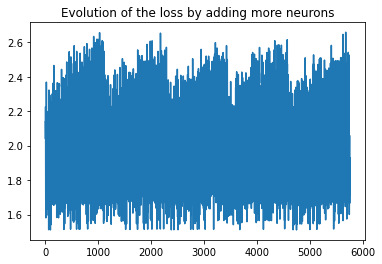

In [2665]:
lossCV_ADAM_2, mseCV_ADAM_2, best_valCV_ADAM_2, l1_CV_ADAM_2, l2_CV_ADAM_2, beta1_ADAM_2, beta2_ADAM_2, n_neuron_CV_BP_2 = KFoldCrossValidation_ADAM_CLF(k, X, Y, lambda1, lambda2, beta1, beta2, min_neurons, max_neurons, N, d, use_one_rs, with_print)

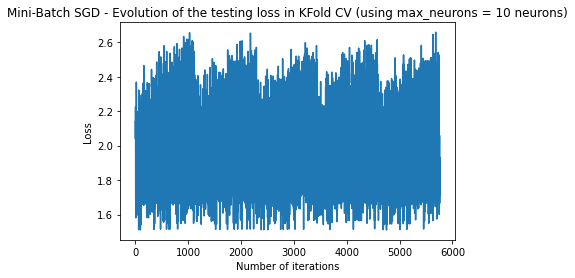

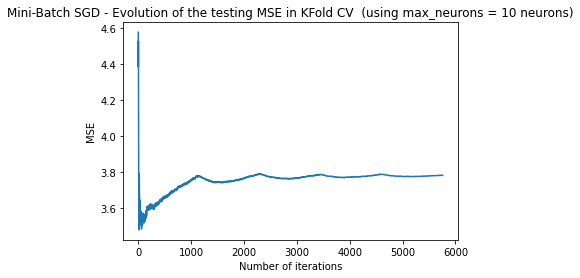

In [2667]:
plotEvolutionInCV(lossCV_ADAM_2, mseCV_ADAM_2, method, max_neurons)

### Training Neural Network

In [2668]:
l1_ADAM_2, l2_ADAM_2, beta1_ADAM_2, beta2_ADAM_2, n_neuron_ADAM_2 = getBestParams(lossCV_ADAM_2, best_valCV_ADAM_2)

len(lossTestingKFold) =  5760
len(best_val) =  5760
Best lambda1 :  0.002
Best lambda2 :  0.04
Best beta 1 :  0.95
Best beta 2 :  0.005
Best n_neuron :  3
The loss we had with those three params :  1.5111258206874036


In [2776]:
l1_ADAM_2, l2_ADAM_2, beta1_ADAM_2, beta2_ADAM_2, n_neuron_ADAM_2

(0.002, 0.04, 0.95, 0.005, 3)

In [2777]:
N= 8000
d = X.shape[1]
with_print = 1

W1 = np.random.rand(n_neuron_ADAM_2,d)
W2 = np.random.rand(1,n_neuron_ADAM_2)

use_one_rs = True
with_print = True

X_train, X_test, y_train, y_test = getPreprocessedData()

In [2778]:
W1, W2, lossTRAIN_ADAM_2, lossTEST_ADAM_2, MSE_train_ADAM_2, MSE_test_ADAM_2 = ADAM_CLF(X_train, X_test, y_train, y_test, W1, W2, l1_ADAM_1, l2_ADAM_1, beta1_ADAM_1, beta2_ADAM_1, n_neuron_ADAM_2, N, d, use_one_rs, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:07<00:00, 1017.77it/s]

W2.shape :  (1, 3)
W1.shape :  (3, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


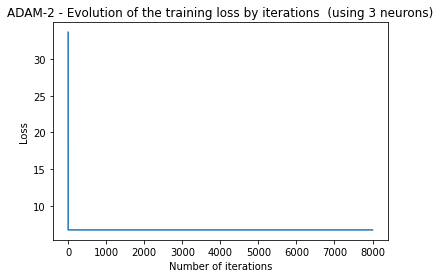

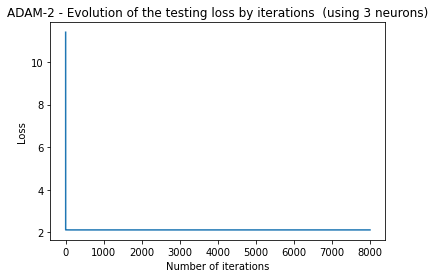

The training MSE is : 45.30939598498211
The testing MSE is : 4.477073977378709


In [2779]:
method = 'ADAM-2'
plotEvolution(lossTRAIN_ADAM_2, lossTEST_ADAM_2, MSE_train_ADAM_2, MSE_test_ADAM_2, method, n_neuron_ADAM_2)

# d- BCD

In [2816]:
def BCD_First_Component_CLF(X, Y, alpha, W1, W2):     
        
    X_W1T = np.vectorize(activation)(np.dot(X,np.transpose(W1)))
    X_W1T_W2T = np.vectorize(activation)(np.dot(X_W1T,np.transpose(W2)))                          

    grad_1 = np.multiply(2,np.dot(np.dot(X.T,(X_W1T_W2T - Y)),W2) + np.transpose(W1))
    W1 = W1 - np.multiply(alpha,grad_1).T
    
    loss = np.multiply(sum(X_W1T_W2T - Y), sum(X_W1T_W2T - Y))

    return W1, loss

In [2817]:
def BCD_SECOND_Component_CLF(X, Y, alpha, W1, W2):
    
    X_W1T = np.vectorize(activation)(np.dot(X,np.transpose(W1)))
    X_W1T_W2T = np.vectorize(activation)(np.dot(X_W1T,np.transpose(W2)))                          

    grad_2 = np.dot(W1,np.dot(X.T,(X_W1T_W2T - Y))) 
    W2 = W2 - np.multiply(alpha,grad_2).T
    
    loss = np.multiply(sum(X_W1T_W2T - Y), sum(X_W1T_W2T - Y))
    
    return W2, loss

In [3028]:
def BCD_CLF(X, Y, W1, W2, N, alpha, start_W1, in_test, with_print) :
    
    lossTest = []
    lossTrain = []
    iterations = [i for i in range(2*N)]
    
    ts = 0.25
    randomValue = np.random.randint(50,size=1)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size=ts, random_state=randomValue)
    
    if(start_W1):
    
        # Optimize W1 then W2
        for i in range(N):
            W1 ,loss_ = BCD_First_Component_CLF(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_First_Component_CLF(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
        for i in range(N):
            W2 ,loss_ = BCD_SECOND_Component_CLF(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_SECOND_Component_CLF(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
    else :
        
        # Optimize W2 then W1
        for i in range(N):
            W2 ,loss_ = BCD_SECOND_Component_CLF(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_SECOND_Component_CLF(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
        for i in range(N):
            W1 ,loss_ = BCD_First_Component_CLF(X_train, y_train, alpha, W1, W2)
            lossTrain.append(loss_)
            tmp, loss = BCD_First_Component_CLF(X_test, y_test, alpha, W1, W2)
            lossTest.append(loss)
            
    lossTrain = np.array(lossTrain)
    lossTest = np.array(lossTest)
            
    
    MSE_TRAIN = MSE(lossTrain)
    MSE_TEST = MSE(lossTest)
        
    if in_test == False and with_print == True:
        
        plt.plot(iterations,lossTest)
        plt.ylabel('Loss')
        plt.xlabel('Number of iterations')
        plt.show()
        
        print("MSE in TRAIN : ", MSE_TRAIN)
        print("MSE in TEST : ", MSE_TEST)
    
        return W1, W2, lossTest, lossTrain, MSE_TRAIN, MSE_TEST
    
    else :
        print("MSE in TEST : ", MSE_TEST)
        
        return W1, W2, lossTest, lossTrain, MSE_TRAIN, MSE_TEST

### Training the BCD

In [2821]:
alpha = 0.0001
N = 4000
n_neuron = 10
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

start_W1 = False
in_test = False

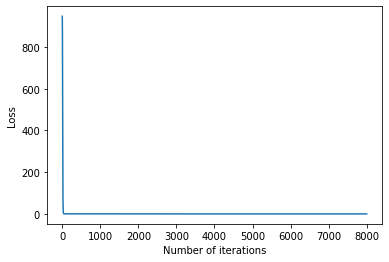

MSE in TRAIN :  90801.57209239044
MSE in TEST :  899.0182628133814


In [2822]:
W1, W2, lossTest, lossTrain, MSE_TRAIN, MSE_TEST = BCD_CLF(X.T, Y, W1, W2, N, alpha,start_W1, in_test, 1)

In [2825]:
lossTrain[-1]

array([0.93721667])

### Testing the BCD

In [2823]:
N = 1
in_test = True
BCD_CLF(X.T, Y, W1, W2, N, alpha,start_W1, in_test)

MSE in TEST :  0.0053468964203134545


# Synthesis : Models Comparison

In [3055]:
def KFoldCrossValidationTest_BP(k, X, Y, W1, W2, lambda1, lambda2, N ,alpha, part1, with_print=0):
    
    ts = int(len(X)/k)
    
    mse_train = []
    mse_test = []
    
    df = getData()
    
    for i in tqdm(range(k)) :
        
        # shuffle the dataset
        df = shuffle(df)

        # to avoid having same random_state in each iteration
        randomValue = np.random.randint(50,size=1)[0]
        
        # The test sample resprensents the N/k size of the dataset with KFold
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

        # Training and testing
        if part1 :
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = backPropagation(X_train.T, X_test.T, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, with_print)
        
        else :
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = backPropagationCLF(X_train.T, X_test.T, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, with_print)
        
        # cost
        mse_train.append(MSE(lossTrain))
        mse_test.append(MSE(lossTest))
        
    mse_train = np.array(mse_train)
    mse_test = np.array(mse_test)
    mean_mse_train = mse_train.mean()
    mean_mse_test = mse_test.mean()
    
    print("Mean Testing MSE : ", mean_mse_test)
    
    return mean_mse_train, mean_mse_test 

In [3056]:
def KFoldCrossValidationTest_SGD(k, X, Y, W1, W2, lambda1, lambda2, N ,alpha, batch_size, part1, with_print=0):
    
    ts = int(len(X)/k)
    
    mse_train = []
    mse_test = []
    
    df = getData()
    
    for i in tqdm(range(k)) :
        
        # shuffle the dataset
        df = shuffle(df)

        # to avoid having same random_state in each iteration
        randomValue = np.random.randint(50,size=1)[0]
        
        # The test sample resprensents the N/k size of the dataset with KFold
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

        # Training and testing
        if part1 :            
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, batch_size, with_print)
        
        else :            
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = miniBatchSGD_CLF(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, alpha, N, batch_size, with_print)
            
        # cost
        mse_train.append(MSE(lossTrain))
        mse_test.append(MSE(lossTest))
        
    mse_train = np.array(mse_train)
    mse_test = np.array(mse_test)
    mean_mse_train = mse_train.mean()
    mean_mse_test = mse_test.mean()
    
    print("Mean Testing MSE : ", mean_mse_test)
    
    return mean_mse_train, mean_mse_test 

In [3057]:
def KFoldCrossValidationTest_ADAM(k, X, Y, W1, W2, lambda1, lambda2, beta1, beta2, N, d, use_one_rs, part1, with_print=0):
    
    ts = int(len(X)/k)
    
    mse_train = []
    mse_test = []
    
    df = getData()
    
    for i in tqdm(range(k)) :
        
        # shuffle the dataset
        df = shuffle(df)

        # to avoid having same random_state in each iteration
        randomValue = np.random.randint(50,size=1)[0]
        
        # The test sample resprensents the N/k size of the dataset with KFold
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=randomValue)

        # Training and testing
        if part1 :            
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = ADAM(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, beta1, beta2, n_neuron, N, d, use_one_rs, with_print)
        
        else :            
            W1_, W2_, lossTrain, lossTest, MSE_train, MSE_test = ADAM_CLF(X_train, X_test, y_train, y_test, W1, W2, lambda1, lambda2, beta1, beta2, n_neuron, N, d, use_one_rs, with_print)
        
        # cost
        mse_train.append(MSE(lossTrain))
        mse_test.append(MSE(lossTest))
        
    mse_train = np.array(mse_train)
    mse_test = np.array(mse_test)
    mean_mse_train = mse_train.mean()
    mean_mse_test = mse_test.mean()
    
    print("Mean Testing MSE : ", mean_mse_test)
    
    return mean_mse_train, mean_mse_test 

In [3058]:
def KFoldCrossValidationTest_BCD(k, X, Y, W1, W2, N, alpha, start_W1, in_test, part1, with_print=0):
    
    ts = int(len(X)/k)
    
    mse_train = []
    mse_test = []
        
    for i in tqdm(range(k)) :

        # Testing
        if part1 :
            W1_, W2_, lossTest, lossTrain, MSE_TRAIN, MSE_TEST  = BCD(X.T, Y, W1, W2, N, alpha, start_W1, in_test, with_print)
        
        else :            
            W1_, W2_, lossTest, lossTrain, MSE_TRAIN, MSE_TEST  = BCD_CLF(X.T, Y, W1, W2, N, alpha, start_W1, in_test, with_print)
        
        # cost
        mse_train.append(MSE(lossTrain))
        mse_test.append(MSE(lossTest))
        
    mse_train = np.array(mse_train)
    mse_test = np.array(mse_test)
    mean_mse_train = mse_train.mean()
    mean_mse_test = mse_test.mean()
    
    print("Mean Testing MSE : ", mean_mse_test)
    
    return mean_mse_train, mean_mse_test 

## Fixed parameters

In [3076]:
n_neuron = 5
k = 5
N = 5000
d = X.shape[1]
with_print = 1
batch_size = 64

In [3077]:
X_train, X_test, y_train, y_test = getPreprocessedData()

# Part I

In [3078]:
part1 = 1

## Back-Propagation 


In [3079]:
l1_BP_1, l2_BP_1, alpha_BP_1 = 0.01, 0.08, 2e-7
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

In [3080]:
W1, W2, lossTRAIN_BP_, lossTEST_BP_, MSE_train_BP_, MSE_test_BP_ = backPropagation(X_train.T, X_test.T, y_train, y_test, W1, W2, l1_BP_1, l2_BP_1, alpha_BP_1, N, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3963.89it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


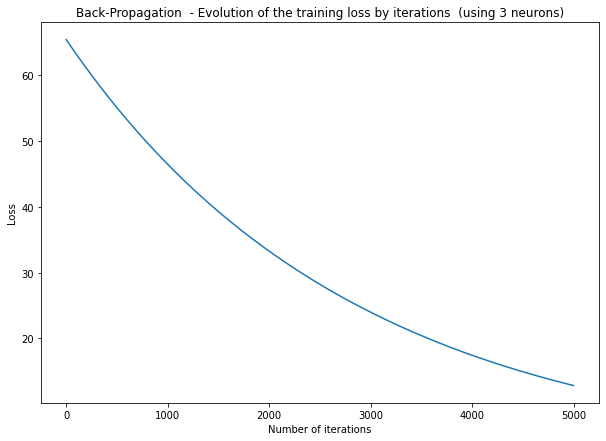

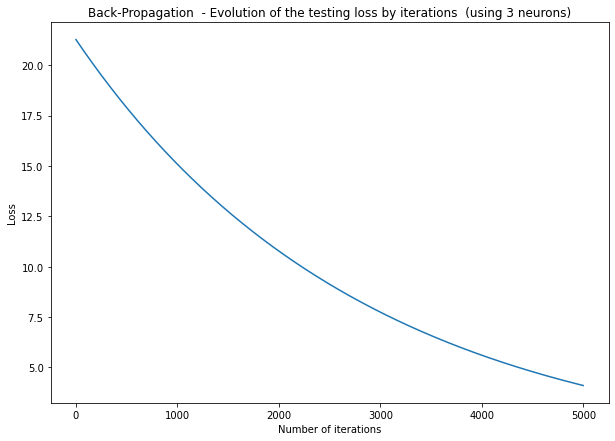

The training MSE is : 1226.8812053882882
The testing MSE is : 128.8787963340622


In [3081]:
method = 'Back-Propagation '
plotEvolution(lossTRAIN_BP_, lossTEST_BP_, MSE_train_BP_, MSE_test_BP_, method, n_neuron)

In [3082]:
mean_mse_train_BP_1, mean_mse_test_BP_1 = KFoldCrossValidationTest_BP(k, X, Y, W1, W2, l1_BP_1, l2_BP_1, N ,alpha_BP_1, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.17s/it]

Mean Testing MSE :  4.053295872750864


## Mini-Batch SGD 


In [3083]:
l1_SGD_1, l2_SGD_1, alpha_SGD_1 = 0.002, 0.004, 2e-7
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

In [3084]:
W1, W2, lossTRAIN_SGD_, lossTEST_SGD_, MSE_train_SGD_, MSE_test_SGD_ = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD_1, l2_SGD_1, alpha_SGD_1, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3220.42it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


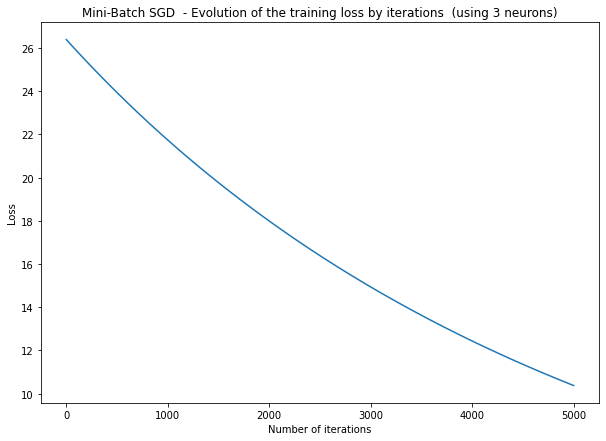

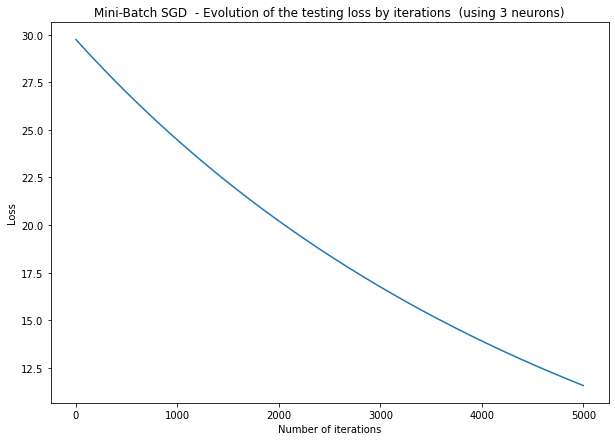

The training MSE is : 311.3803168898846
The testing MSE is : 393.0893156125116


In [3085]:
method = 'Mini-Batch SGD '
plotEvolution(lossTRAIN_SGD_, lossTEST_SGD_, MSE_train_SGD_, MSE_test_SGD_, method, n_neuron)

In [3086]:
mean_mse_train_SGD_1, mean_mse_test_SGD_1 = KFoldCrossValidationTest_SGD(k, X, Y, W1, W2, l1_SGD_1, l2_SGD_1, N ,alpha_SGD_1, batch_size, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.14it/s]

Mean Testing MSE :  83.78388727630366


## ADAM 


In [3087]:
l1_AD_1, l2_AD_1, b1_AD_1, b2_AD_1 = 0.002, 0.004, 0.1, 0.1
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)
use_one_rs = True
with_print = True

In [3088]:
W1, W2, lossTRAIN_ADAM_1_, lossTEST_ADAM_1_, MSE_train_ADAM_1_, MSE_test_ADAM_1_ = ADAM(X_train, X_test, y_train, y_test, W1, W2, l1_AD_1, l2_AD_1, b1_AD_1, b2_AD_1, n_neuron, N, d, use_one_rs, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1045.67it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


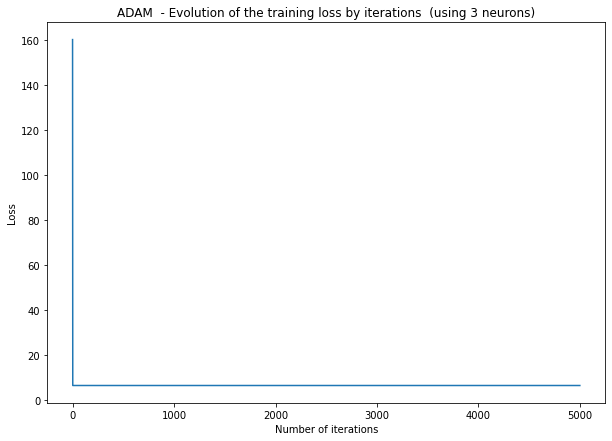

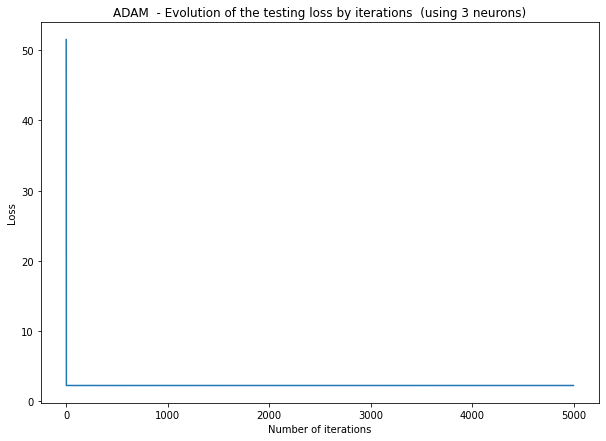

The training MSE is : 48.50313081323895
The testing MSE is : 5.6129518520172565


In [3089]:
method = 'ADAM '
plotEvolution(lossTRAIN_ADAM_1_, lossTEST_ADAM_1_, MSE_train_ADAM_1_, MSE_test_ADAM_1_, method, n_neuron)

In [3090]:
mean_mse_train_AD_1, mean_mse_test_AD_1 = KFoldCrossValidationTest_ADAM(k, X, Y, W1, W2, l1_AD_1, l2_AD_1, b1_AD_1, b2_AD_1, N, d, use_one_rs, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.51s/it]

Mean Testing MSE :  3.160436407931744


## BCD

# Comparison Figures - Part 1

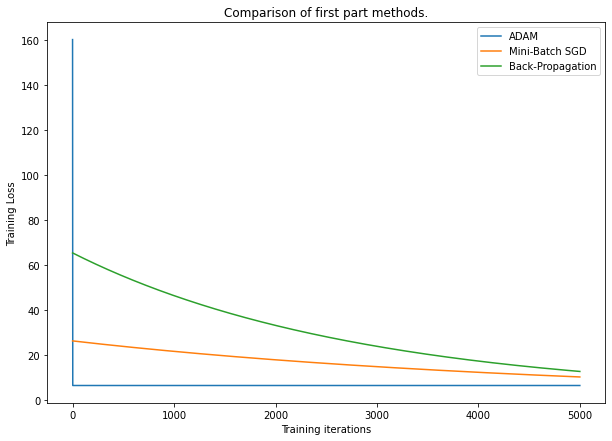

In [3091]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTRAIN_ADAM_1_, label="ADAM")
plt.plot(lossTRAIN_SGD_, label="Mini-Batch SGD")
plt.plot(lossTRAIN_BP_, label="Back-Propagation")

plt.title("Comparison of first part methods.")
plt.xlabel("Training iterations")
plt.ylabel("Training Loss")
plt.legend(loc="upper right")
plt.show()

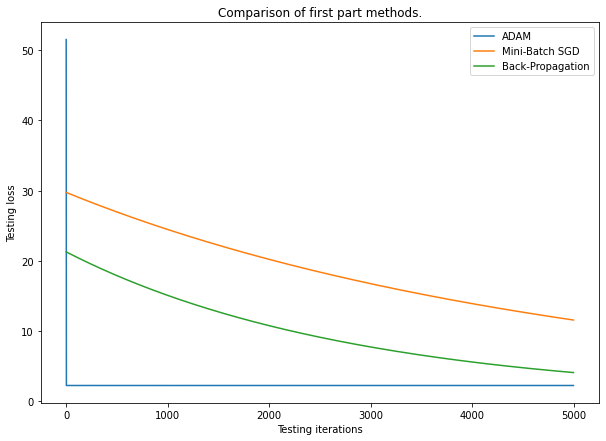

In [3093]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTEST_ADAM_1_, label="ADAM")
plt.plot(lossTEST_SGD_, label="Mini-Batch SGD")
plt.plot(lossTEST_BP_, label="Back-Propagation")

plt.title("Comparison of first part methods.")
plt.xlabel("Testing iterations")
plt.ylabel("Testing loss")
plt.legend(loc="upper right")
plt.show()

# Part II

In [3061]:
part1 = 0

## Back-Propagation 


In [3062]:
l1_BP_2, l2_BP_2, alpha_BP_2 = 0.002, 0.1, 2e-5
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

In [3063]:
W1, W2, lossTRAIN_BP_2, lossTEST_BP_2, MSE_train_BP_2, MSE_test_BP_2 = backPropagationCLF(X_train.T, X_test.T, y_train, y_test, W1, W2, l1_BP_2, l2_BP_2, alpha_BP_2, N, with_print)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2796.23it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


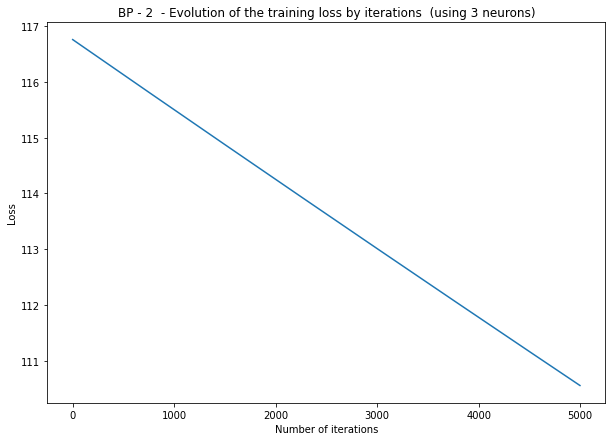

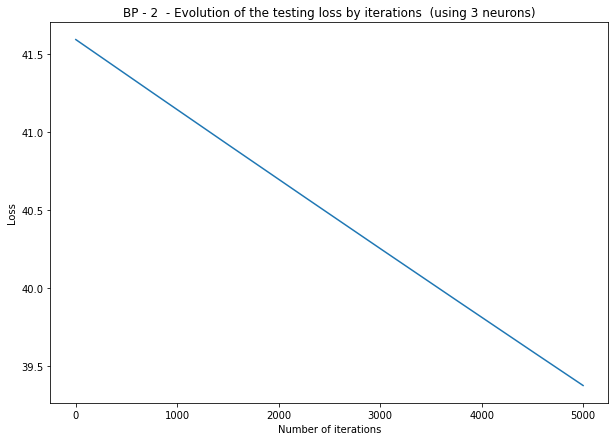

The training MSE is : 12916.974625222272
The testing MSE is : 1638.884853981233


In [3064]:
method = 'BP - 2 '
plotEvolution(lossTRAIN_BP_2, lossTEST_BP_2, MSE_train_BP_2, MSE_test_BP_2, method, n_neuron)

In [3065]:
mean_mse_train_BP_2, mean_mse_test_BP_2 = KFoldCrossValidationTest_BP(k, X, Y, W1, W2, l1_BP_2, l2_BP_2, N ,alpha_BP_2, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.62s/it]

Mean Testing MSE :  813.721502136902


## Mini-Batch SGD 


In [3066]:
l1_SGD_2, l2_SGD_2, alpha_SGD_2 = 0.02, 0.08, 0.002

W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

In [3067]:
W1, W2, lossTRAIN_SGD_2, lossTEST_SGD_2, MSE_train_SGD_2, MSE_test_SGD_2 = miniBatchSGD(X_train, X_test, y_train, y_test, W1, W2, l1_SGD_2, l2_SGD_2, alpha_SGD_2, N, batch_size, with_print=1)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3104.93it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044
Last loss value :  1.800080290818973


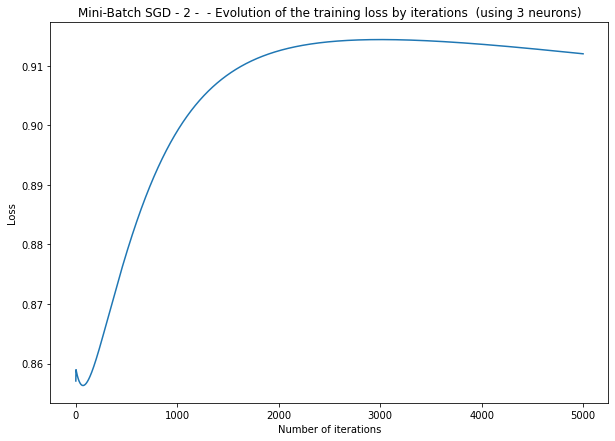

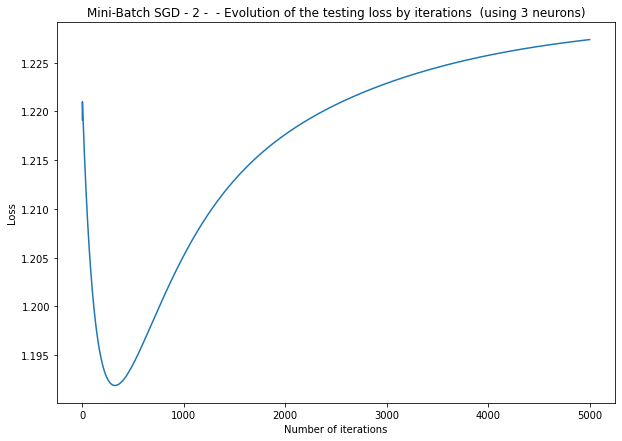

The training MSE is : 0.8195171956060178
The testing MSE is : 1.4799565847643106


In [3068]:
method = 'Mini-Batch SGD - 2 - '
plotEvolution(lossTRAIN_SGD_2, lossTEST_SGD_2, MSE_train_SGD_2, MSE_test_SGD_2, method, n_neuron)

In [3069]:
mean_mse_train_SGD_2, mean_mse_test_SGD_2 = KFoldCrossValidationTest_SGD(k, X, Y, W1, W2, l1_SGD_2, l2_SGD_2, N ,alpha_SGD_2, batch_size, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.20s/it]

Mean Testing MSE :  9.555803977407038


## ADAM 


In [3070]:
l1_AD_2, l2_AD_2, b1_AD_2, b2_AD_2 = 0.002, 0.004, 0.1, 0.1
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)
use_one_rs = True
with_print = True

In [3071]:
W1, W2, lossTRAIN_ADAM_2_, lossTEST_ADAM_2_, MSE_train_ADAM_2_, MSE_test_ADAM_2_ = ADAM(X_train, X_test, y_train, y_test, W1, W2, l1_AD_2, l2_AD_2, b1_AD_2, b2_AD_2, n_neuron, N, d, use_one_rs, with_print)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 974.34it/s]

W2.shape :  (1, 5)
W1.shape :  (5, 14)
X.shape :  (242, 14)
Loss mean :  2.1027500576070044


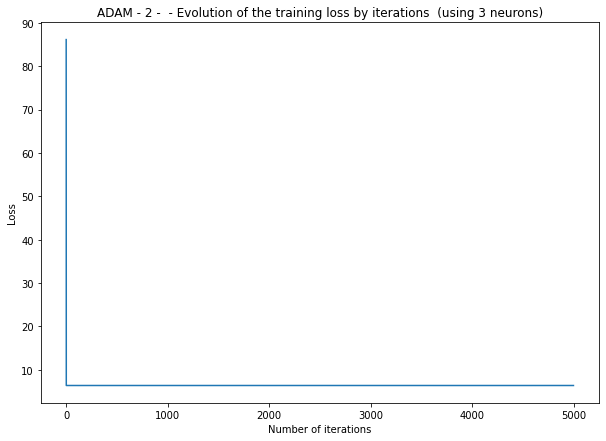

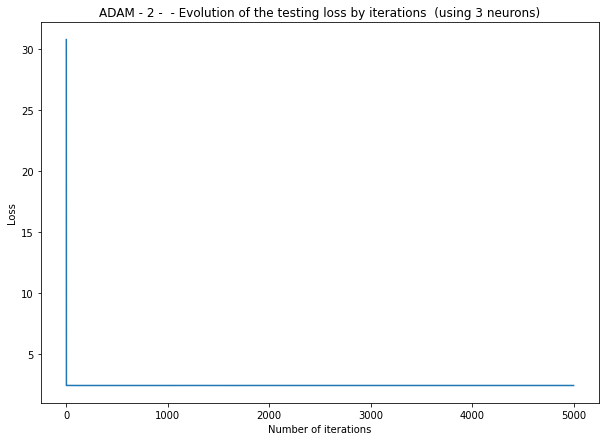

The training MSE is : 42.08514337886716
The testing MSE is : 6.2079703046509


In [3072]:
method = 'ADAM - 2 - '
plotEvolution(lossTRAIN_ADAM_2_, lossTEST_ADAM_2_, MSE_train_ADAM_2_, MSE_test_ADAM_2_, method, n_neuron)

In [3073]:
mean_mse_train_ADAM_2, mean_mse_test_ADAM_2 = KFoldCrossValidationTest_ADAM(k, X, Y, W1, W2, l1_AD_1, l2_AD_1, b1_AD_1, b2_AD_1, N, d, use_one_rs, part1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.73s/it]

Mean Testing MSE :  3.0761902965613452


## BCD

In [3051]:
alpha = 0.0001
W1 = np.random.rand(n_neuron,d)
W2 = np.random.rand(1,n_neuron)

start_W1 = False
in_test = False
with_print = True

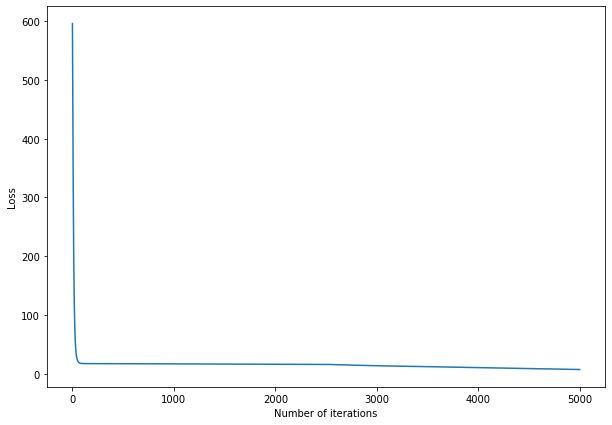

MSE in TRAIN :  25451.178272775385
MSE in TEST :  682.6588193950004


In [3052]:
W1, W2, lossTEST_BCD_2, lossTRAIN_BCD_2, MSE_TRAIN_BCD_2, MSE_TEST_BCD_2 = BCD_CLF(X.T, Y, W1, W2, N//2, alpha,start_W1, in_test, with_print)

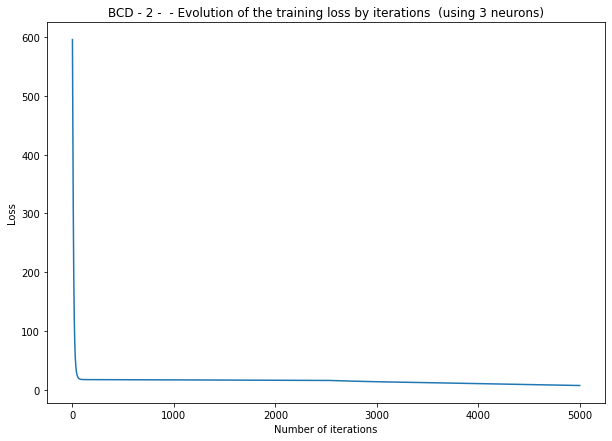

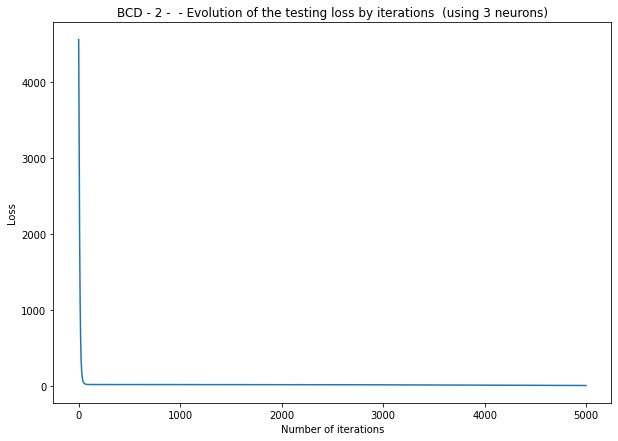

The training MSE is : 25451.178272775385
The testing MSE is : 682.6588193950004


In [3053]:
method = 'BCD - 2 - '
plotEvolution(lossTEST_BCD_2, lossTRAIN_BCD_2, MSE_TRAIN_BCD_2, MSE_TEST_BCD_2, method, n_neuron)

In [3054]:
mean_mse_train_BCD_2, mean_mse_test_BCD_2 = KFoldCrossValidationTest_BCD(k, X, Y, W1, W2, N//2, alpha, start_W1, in_test, part1)

 20%|████████████████▊                                                                   | 1/5 [00:15<01:02, 15.73s/it]

MSE in TEST :  0.03962248423585412


 40%|█████████████████████████████████▌                                                  | 2/5 [00:32<00:48, 16.10s/it]

MSE in TEST :  6.570219907142789


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:49<00:32, 16.28s/it]

MSE in TEST :  2.3703978542689716


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:04<00:16, 16.04s/it]

MSE in TEST :  0.1539166195823645


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:20<00:00, 16.12s/it]

MSE in TEST :  1.6627985123111604
Mean Testing MSE :  2.159391075508228


# Comparison Figures - Part 2

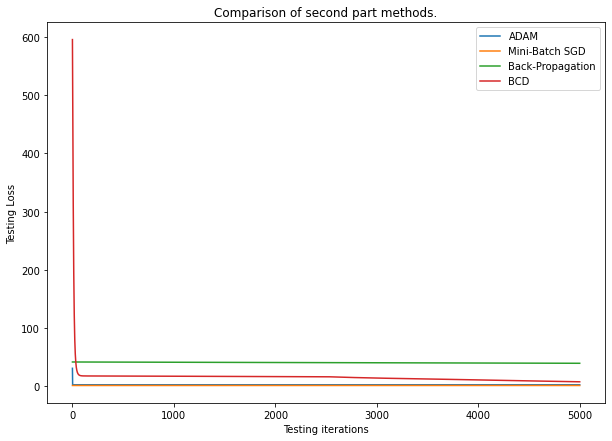

In [3074]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTEST_ADAM_2_, label="ADAM")
plt.plot(lossTEST_SGD_2, label="Mini-Batch SGD")
plt.plot(lossTEST_BP_2, label="Back-Propagation")
plt.plot(lossTEST_BCD_2, label="BCD")

plt.title("Comparison of second part methods.")
plt.xlabel("Testing iterations")
plt.ylabel("Testing Loss")
plt.legend(loc="upper right")
plt.show()

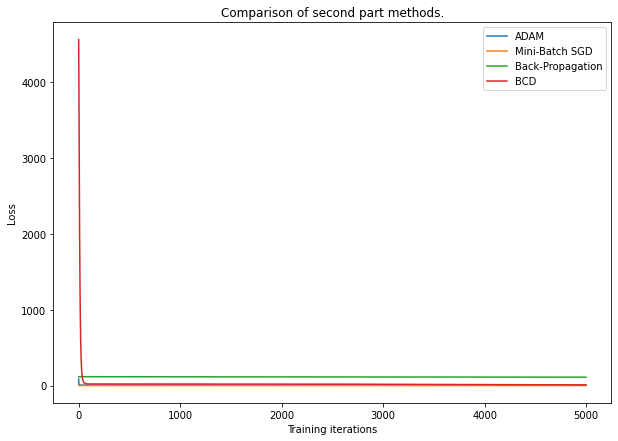

In [3075]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTRAIN_ADAM_2_, label="ADAM")
plt.plot(lossTRAIN_SGD_2, label="Mini-Batch SGD")
plt.plot(lossTRAIN_BP_2, label="Back-Propagation")
plt.plot(lossTRAIN_BCD_2, label="BCD")

plt.title("Comparison of second part methods.")
plt.xlabel("Training iterations")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

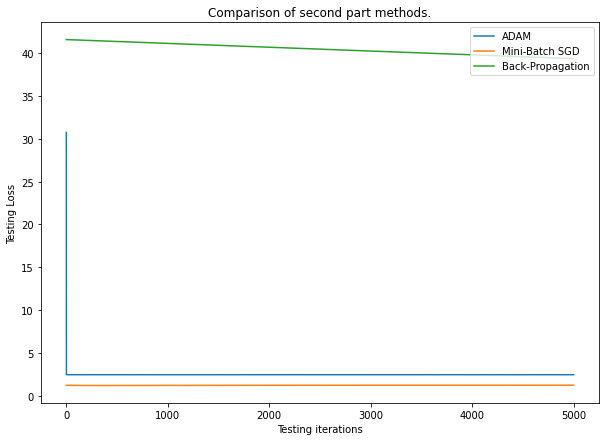

In [3096]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTEST_ADAM_2_, label="ADAM")
plt.plot(lossTEST_SGD_2, label="Mini-Batch SGD")
plt.plot(lossTEST_BP_2, label="Back-Propagation")

plt.title("Comparison of second part methods.")
plt.xlabel("Testing iterations")
plt.ylabel("Testing Loss")
plt.legend(loc="upper right")
plt.show()

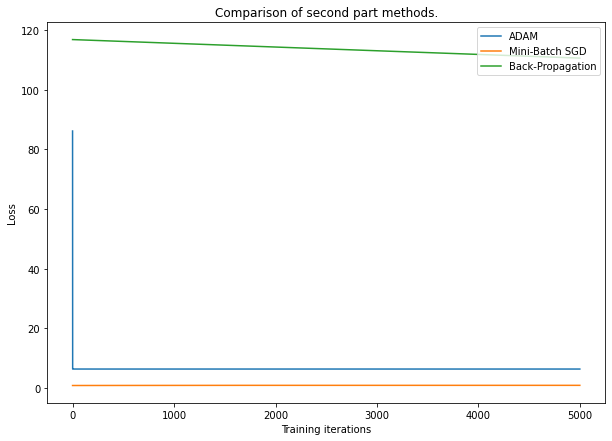

In [3094]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(lossTRAIN_ADAM_2_, label="ADAM")
plt.plot(lossTRAIN_SGD_2, label="Mini-Batch SGD")
plt.plot(lossTRAIN_BP_2, label="Back-Propagation")

plt.title("Comparison of second part methods.")
plt.xlabel("Training iterations")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()